INTRODUCTION


Employee attrition happens when an employee leaves an organization for any reason and is not replaced for a long time, or not ever. It often results in a decrease in the size of an organization's or department's workforce because positions aren't refilled when employees leave



Importing libraries

In [ ]:
# Libray for Data Manipulation.
import pandas as pd
import numpy as np

#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings('ignore')

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)

Importing dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving HR Data.csv to HR Data.csv


In [ ]:
df1 = pd.read_csv('HR Data.csv', delimiter=',')
df1.dataframeName = 'HR Data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1470 rows and 35 columns


In [ ]:
df1.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

Data Wrangling

In [ ]:
print("dataset shape: ",df1.shape)

dataset shape:  (1470, 35)


Statistical summary

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Identify the data types of columns
column_data_types = df1.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 26 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


In [ ]:
df1.select_dtypes(np.number).sample(5)

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
935   32        604                 8          3              1   
191   27        894                 9          3              1   
788   28        857                10          3              1   
119   43        394                26          2              1   
819   28       1451                 2          1              1   

     EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
935            1304                        3          56               4   
191             260                        4          99               3   
788            1097                        3          59               3   
119             158                        3          92               3   
819            1136                        1          67               2   

     JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
935         2                4           6209        11693   
191         1                2           2279        11781   
788         2                3           3660         7909   
119         4                4          16959        19494   
819         1                2           3201        19911   

     NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
935                   1                 15                  3   
191                   1                 16                  3   
788                   3                 13                  3   
119                   1                 12                  3   
819                   0                 17                  3   

     RelationshipSatisfaction  StandardHours  StockOptionLevel  \
935                         3             80                 2   
191                         4             80                 0   
788                         4             80                 0   
119                         4             80                 2   
819                         1             80                 0   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
935                 10                      4                4   
191                  7                      2                2   
788                 10                      4                4   
119                 25                      3                4   
819                  6                      2                1   

     YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
935              10                   7                        0   
191               7                   7                        0   
788               8                   7                        1   
119              25                  12                        4   
819               5                   3                        0   

     YearsWithCurrManager  
935                     8  
191                     3  
788                     7  
119                    12  
819                     4

In [ ]:
df1.select_dtypes(include='O').sample(5)

Attrition     BusinessTravel              Department    EducationField  \
1200        No      Travel_Rarely         Human Resources     Life Sciences   
679         No         Non-Travel                   Sales         Marketing   
906         No      Travel_Rarely  Research & Development  Technical Degree   
1056       Yes  Travel_Frequently                   Sales  Technical Degree   
508         No      Travel_Rarely  Research & Development     Life Sciences   

      Gender               JobRole MaritalStatus Over18 OverTime  
1200  Female       Human Resources      Divorced      Y      Yes  
679   Female       Sales Executive       Married      Y       No  
906   Female    Research Scientist       Married      Y       No  
1056    Male  Sales Representative       Married      Y       No  
508     Male    Research Scientist        Single      Y       No

checking the duplicates

In [ ]:
print("Duplicates in Dataset: ",df1.duplicated().sum())

Duplicates in Dataset:  0


missing data

In [ ]:
missing_data = df1.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df1))*100,2)
missing_data

Total No. of Missing Values  % of Missing Values
Age                                                 0                  0.0
Attrition                                           0                  0.0
BusinessTravel                                      0                  0.0
DailyRate                                           0                  0.0
Department                                          0                  0.0
DistanceFromHome                                    0                  0.0
Education                                           0                  0.0
EducationField                                      0                  0.0
EmployeeCount                                       0                  0.0
EmployeeNumber                                      0                  0.0
EnvironmentSatisfaction                             0                  0.0
Gender                                              0                  0.0
HourlyRate                                          0                  0.0
JobInvolvement                                      0                  0.0
JobLevel                                            0                  0.0
JobRole                                             0                  0.0
JobSatisfaction                                     0                  0.0
MaritalStatus                                       0                  0.0
MonthlyIncome                                       0                  0.0
MonthlyRate                                         0                  0.0
NumCompaniesWorked                                  0                  0.0
Over18                                              0                  0.0
OverTime                                            0                  0.0
PercentSalaryHike                                   0                  0.0
PerformanceRating                                   0                  0.0
RelationshipSatisfaction                            0                  0.0
StandardHours                                       0                  0.0
StockOptionLevel                                    0                  0.0
TotalWorkingYears                                   0                  0.0
TrainingTimesLastYear                               0                  0.0
WorkLifeBalance                                     0                  0.0
YearsAtCompany                                      0                  0.0
YearsInCurrentRole                                  0                  0.0
YearsSinceLastPromotion                             0                  0.0
YearsWithCurrManager                                0                  0.0

Dropping Attritbutes which doesn't imply any meaningful insights in our analysis.

In [ ]:
cols = ["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
df1.drop(columns=cols, inplace=True)

Performing Descriptive Analysis on Categorical Attributes

In [ ]:
df1.describe(include="O").T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
OverTime        1470      2                      No  1054

Checking Unique Values of Categorical Attributes.

In [ ]:
cat_cols = df1.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(df1[column]))
    print("-"*140)

Unique values of  Attrition {'No', 'Yes'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  BusinessTravel {'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  Department {'Human Resources', 'Research & Development', 'Sales'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  EducationField {'Life Sciences', 'Human Resources', 'Marketing', 'Other', 'Technical Degree', 'Medical'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  Gender {'Male', 'Female'}
---------------------------------------------------------

Exploratory Data Analysis (EDA)

Visualizing the Employee Attrition Rate

Text(0.5, 1.0, 'Employee Attrition Rate')

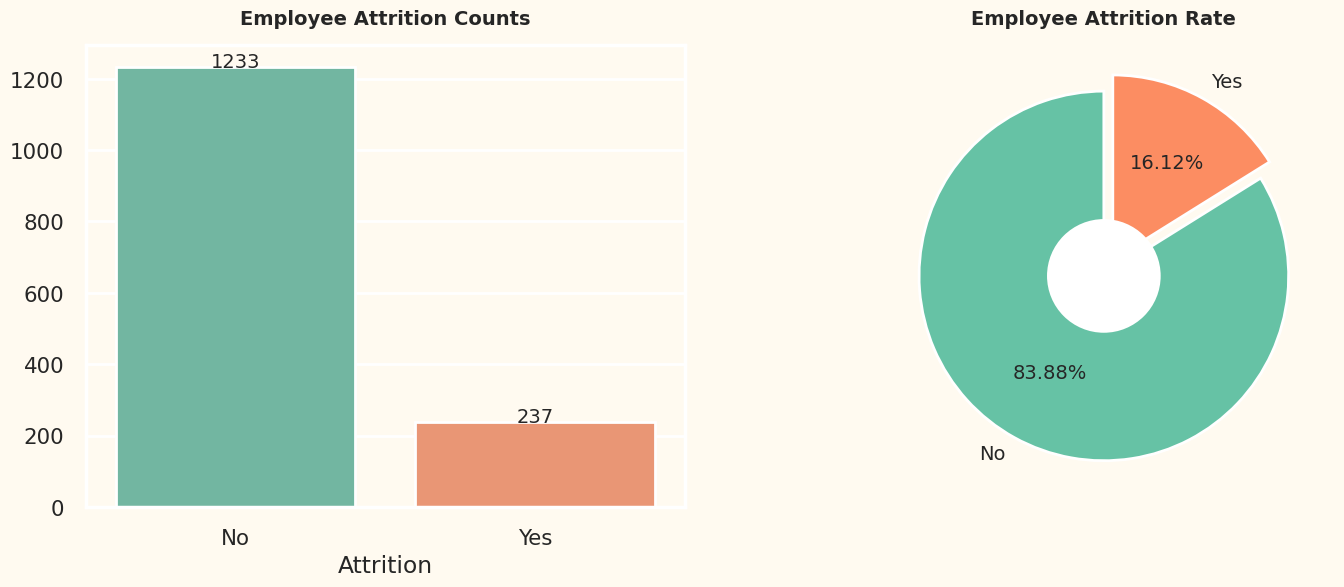

In [ ]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df1["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)

In [ ]:
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(14, 6))

    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    # First subplot: Pie chart
    plt.subplot(1, 2, 1)
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Sort the values in the same order
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

Analyzing Employee Attrition by Gender

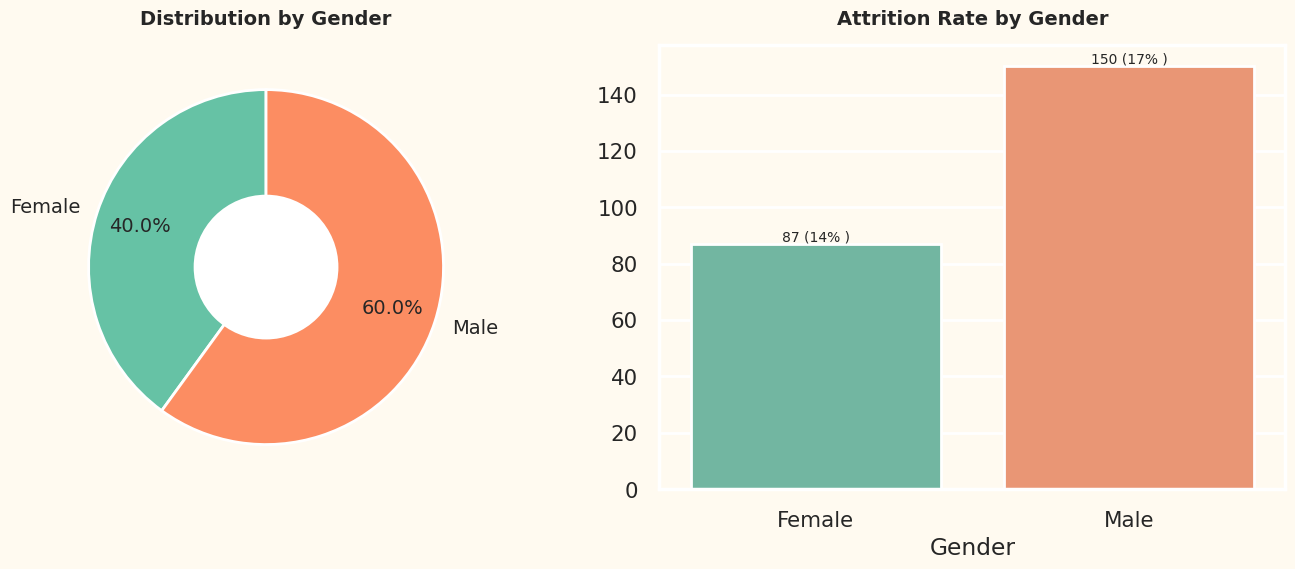

In [ ]:
pie_bar_plot(df1, 'Gender', 'Attrition')

Analyzing Employee Attrition by Marital Status

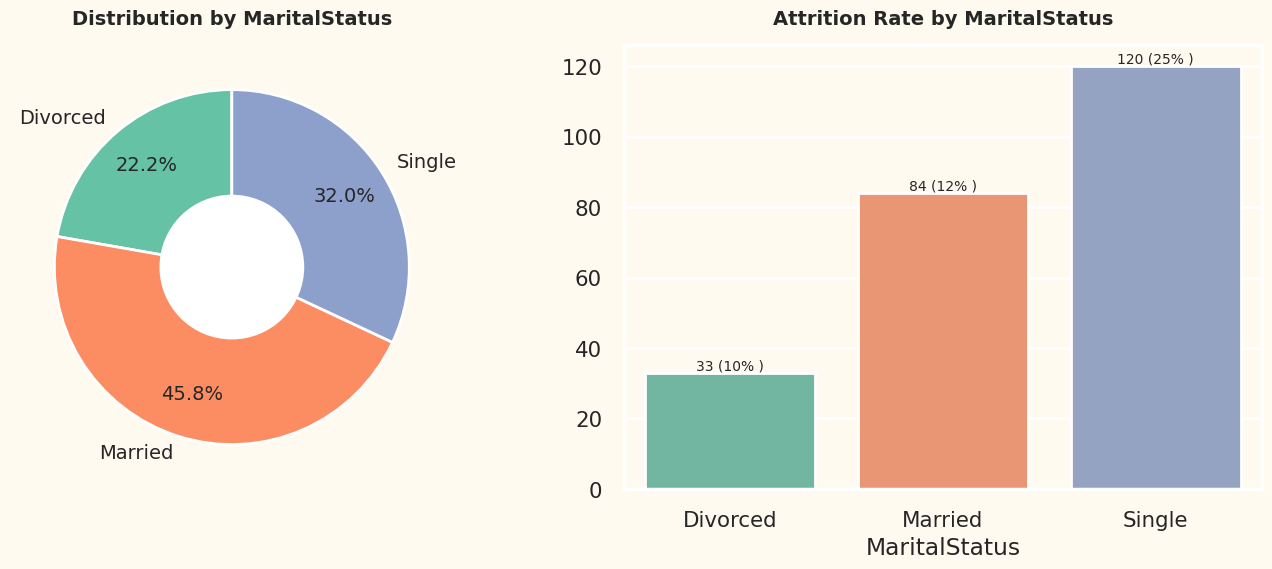

In [ ]:
pie_bar_plot(df1, 'MaritalStatus', 'Attrition')

Analyzing Employee Attrition by Business Travel.

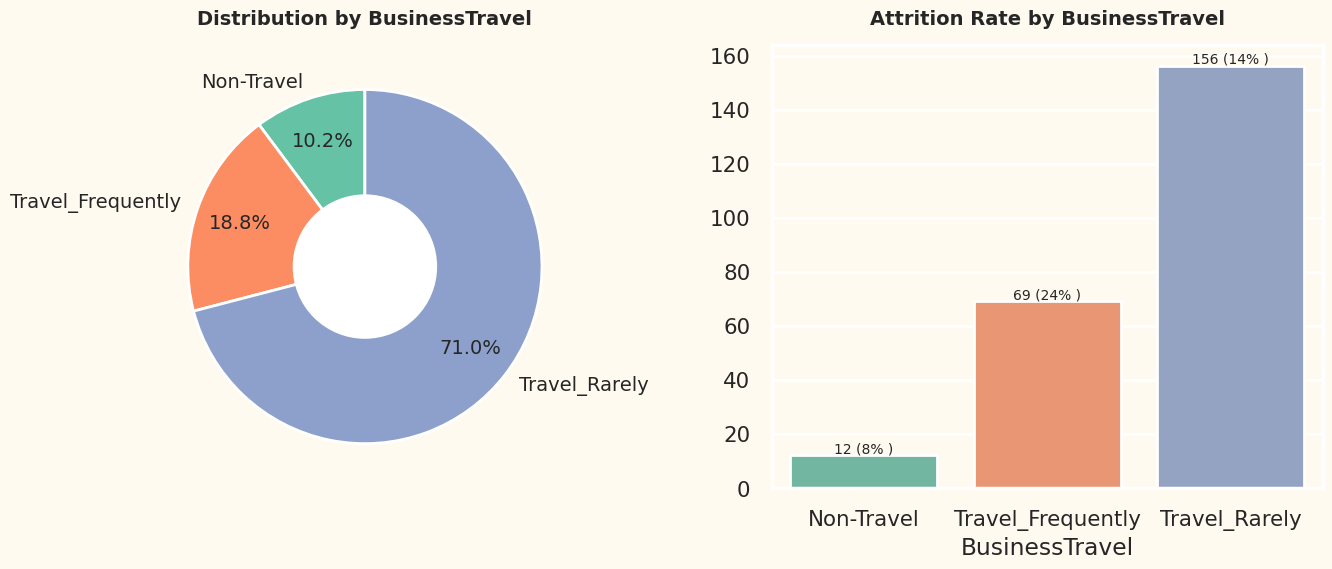

In [ ]:
pie_bar_plot(df1, 'BusinessTravel', 'Attrition')

Analyzing Employee Attrition by Department

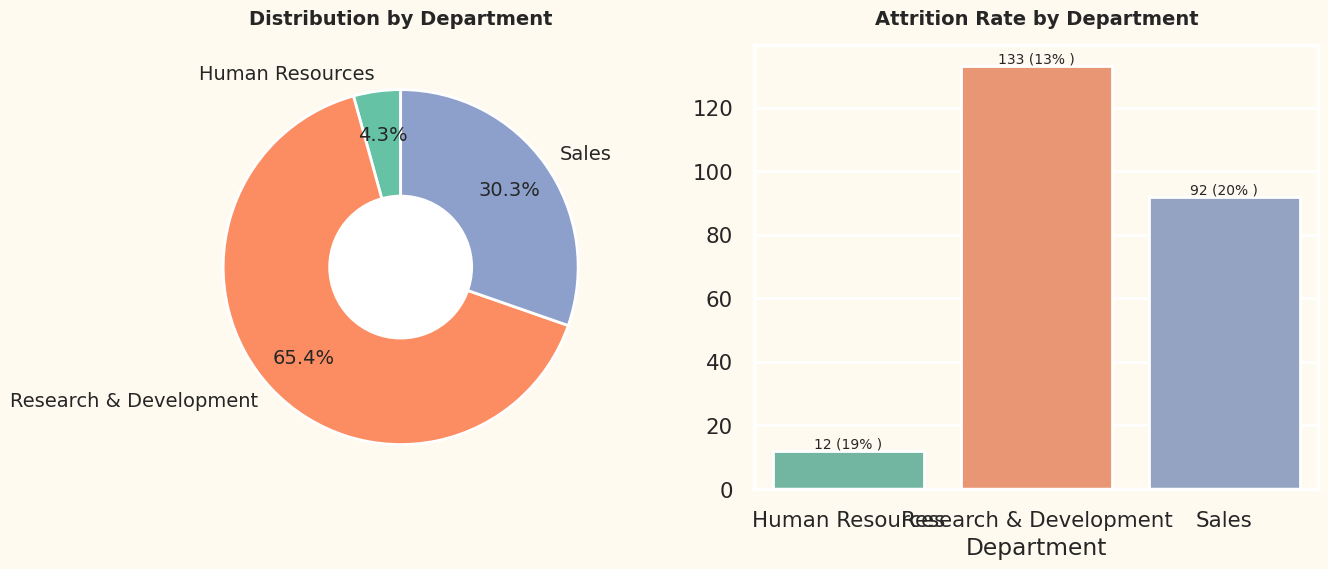

In [ ]:
pie_bar_plot(df1, 'Department', 'Attrition')

Analyzing Employee Attrition by Education.

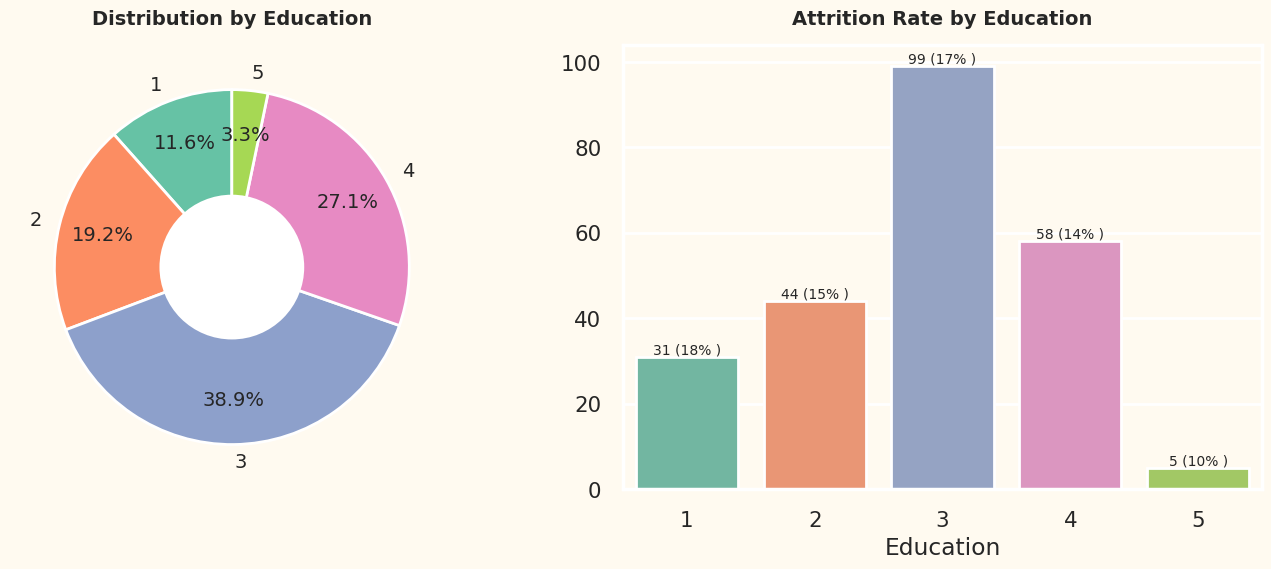

In [ ]:
pie_bar_plot(df1, 'Education', 'Attrition')

In [ ]:
def hist_with_hue(df1, col, hue):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=df1, kde=True, palette='Set2')

    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha = 'center')  # Rotate x-axis labels by 90 degrees and center-align

    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df1, palette='Set2')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

Employee Distribution by Age

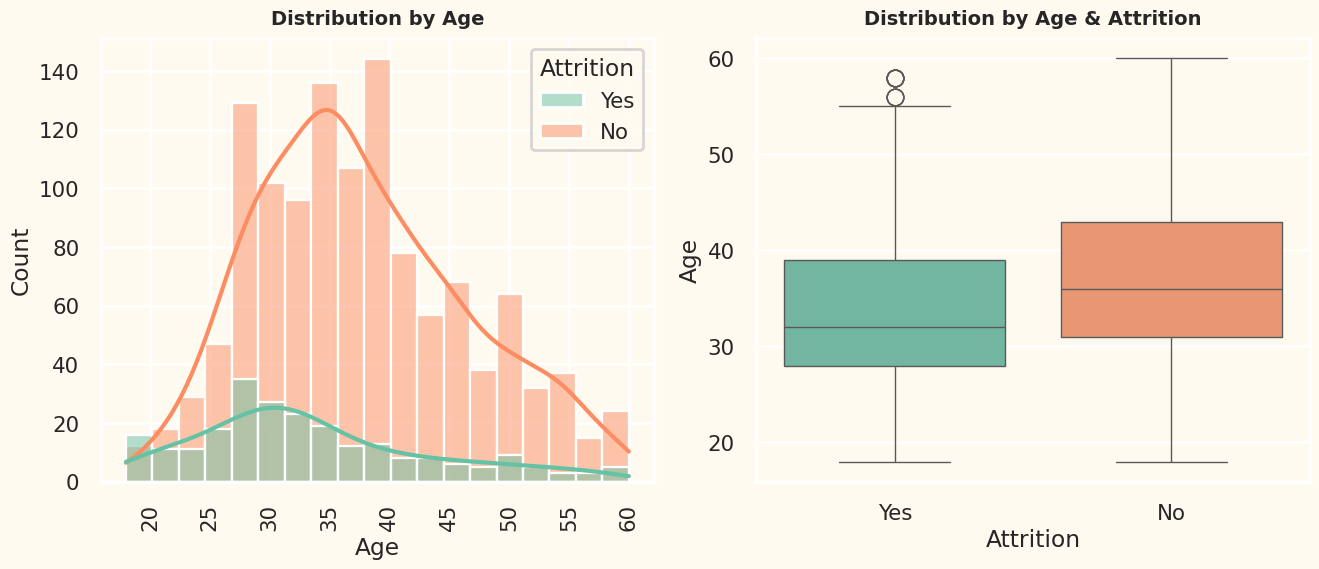

In [ ]:
hist_with_hue(df1,'Age','Attrition')

In [ ]:
def count_percent_plot(df1, col, hue):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = df1[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df1)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df1[df1[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks( rotation=90)
    plt.tight_layout()
    plt.show()

Analyzing Employee Attrition by Education Field

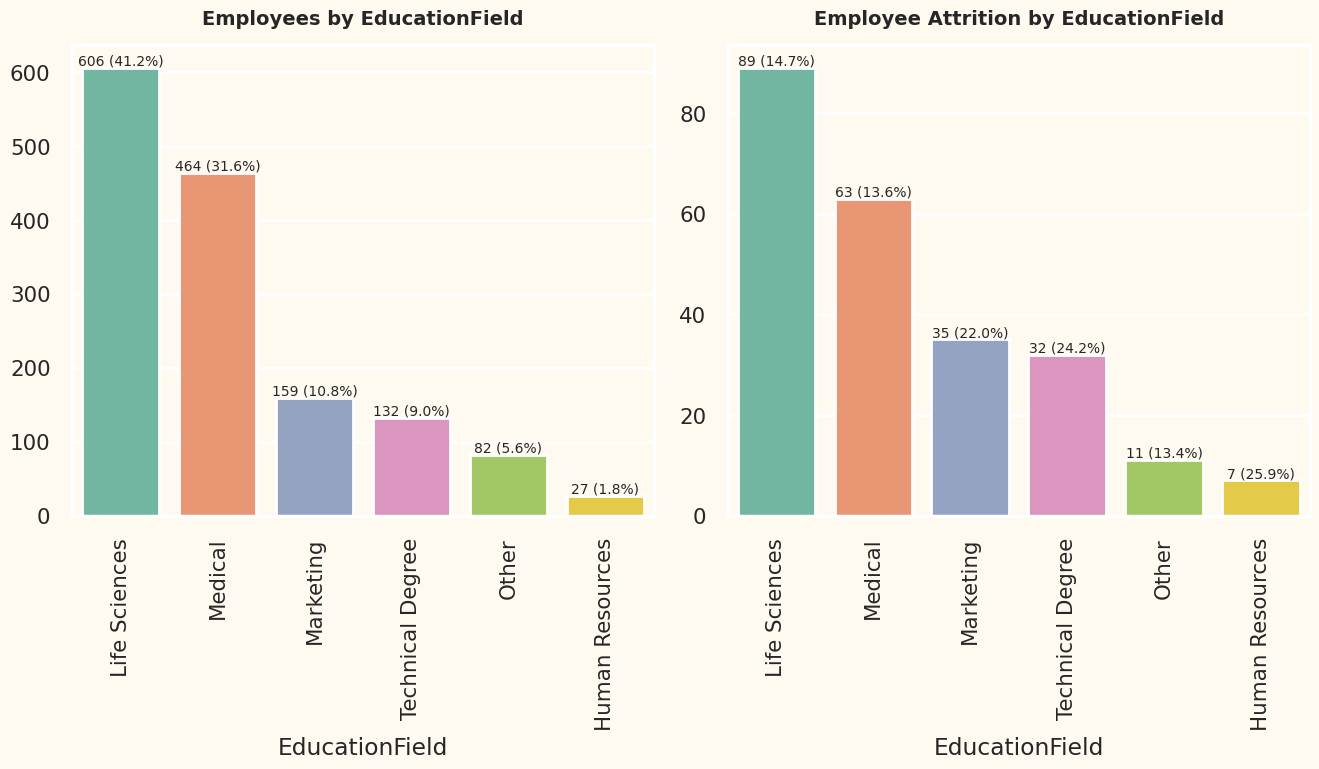

In [ ]:
count_percent_plot(df1, 'EducationField', 'Attrition')

Analyzing Employee Attrition by Environment Satisfaction.

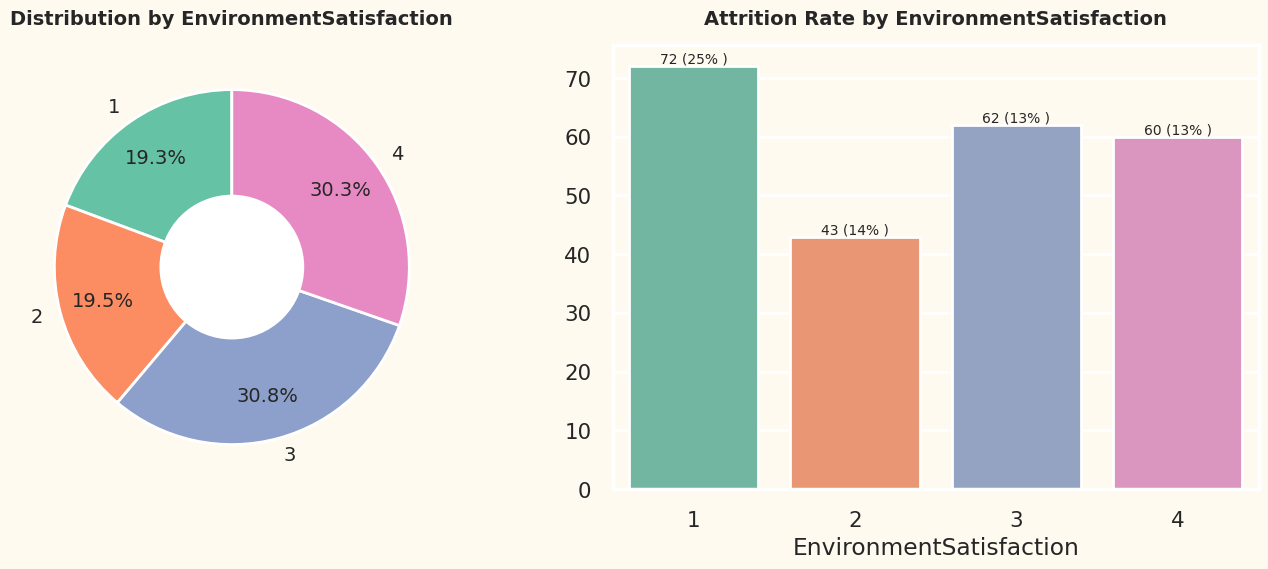

In [ ]:
pie_bar_plot(df1, 'EnvironmentSatisfaction', 'Attrition')

Analyzing Employee Attrition by Job Satisfaction.

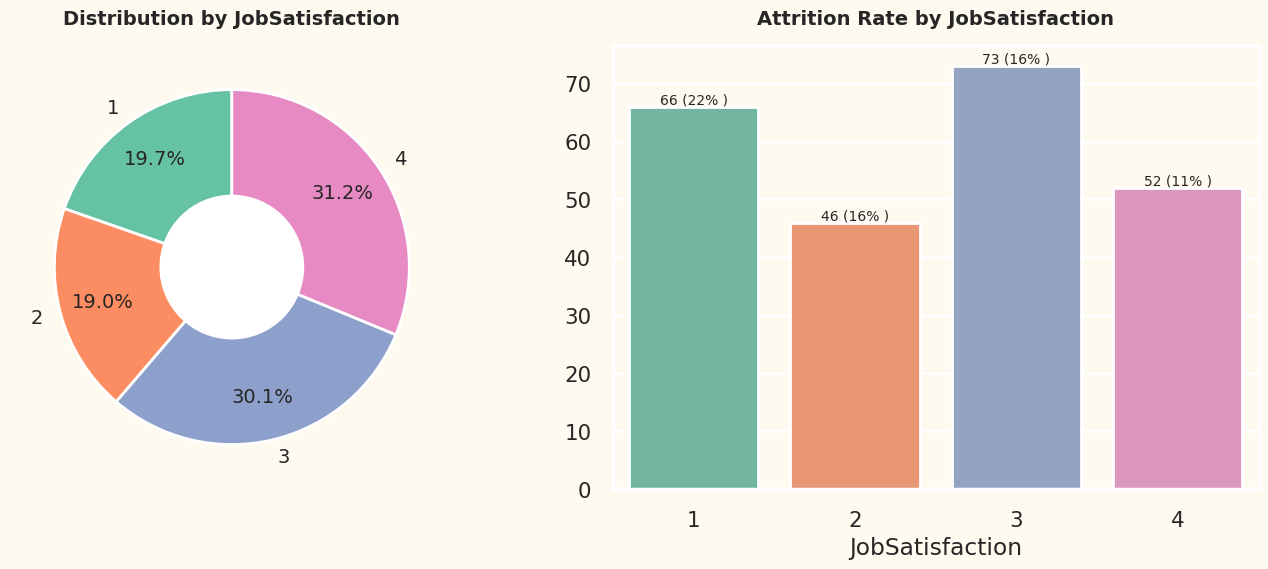

In [ ]:
pie_bar_plot(df1, 'JobSatisfaction', 'Attrition')

Analyzing Employee Attrition by Relationship Satisfaction.

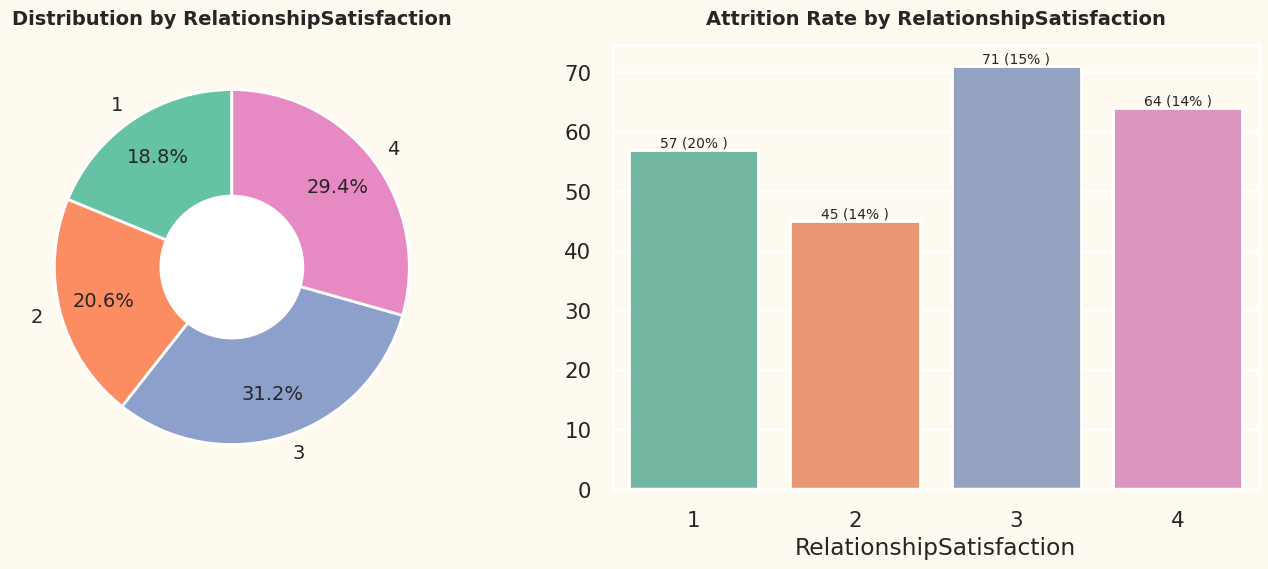

In [ ]:
pie_bar_plot(df1, 'RelationshipSatisfaction', 'Attrition')

Analyzing Employee Attrition by Work Life Balance.

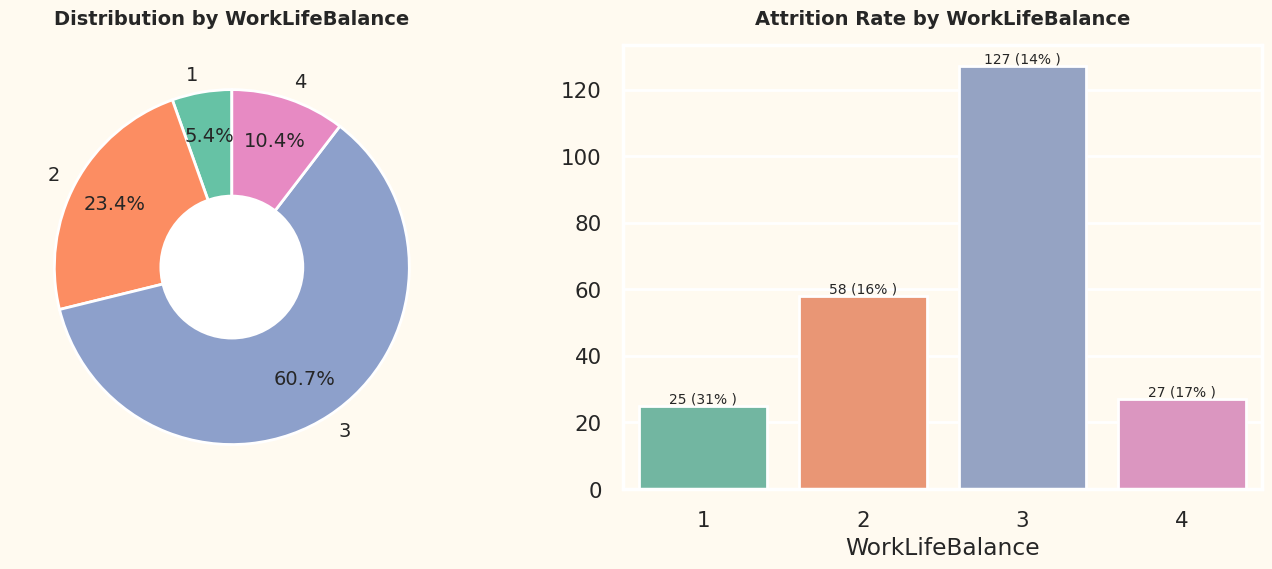

In [ ]:
pie_bar_plot(df1, 'WorkLifeBalance', 'Attrition')

Analyzing Employee Attrition by Performance Rating.

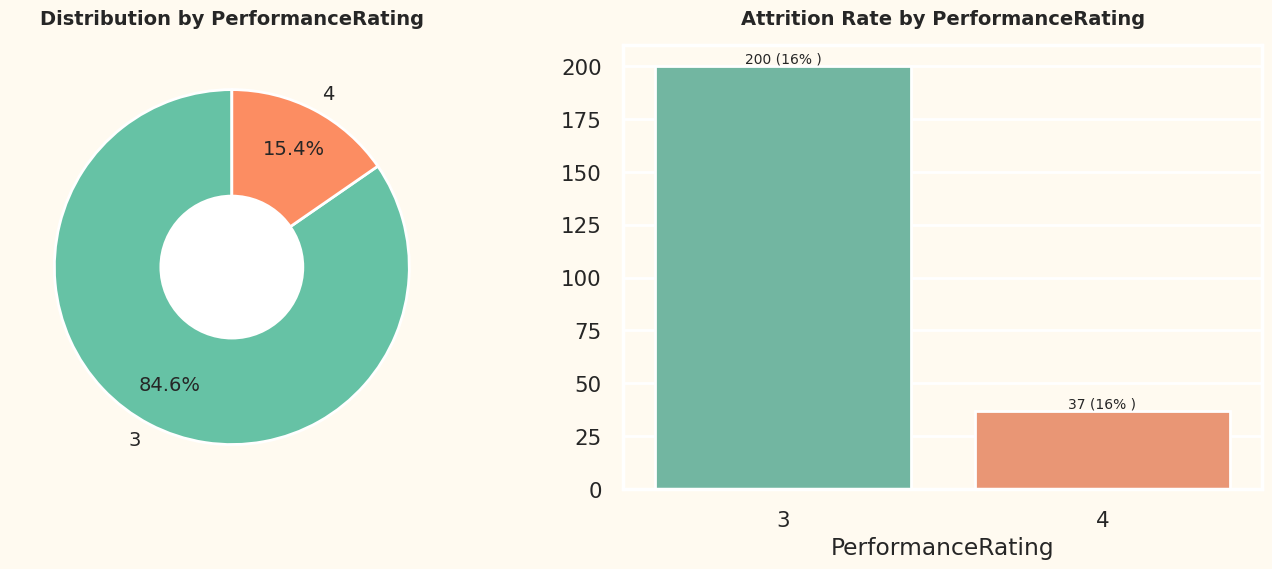

In [ ]:
pie_bar_plot(df1, 'PerformanceRating', 'Attrition')

Analyzing Employee Attrition by Over Time.




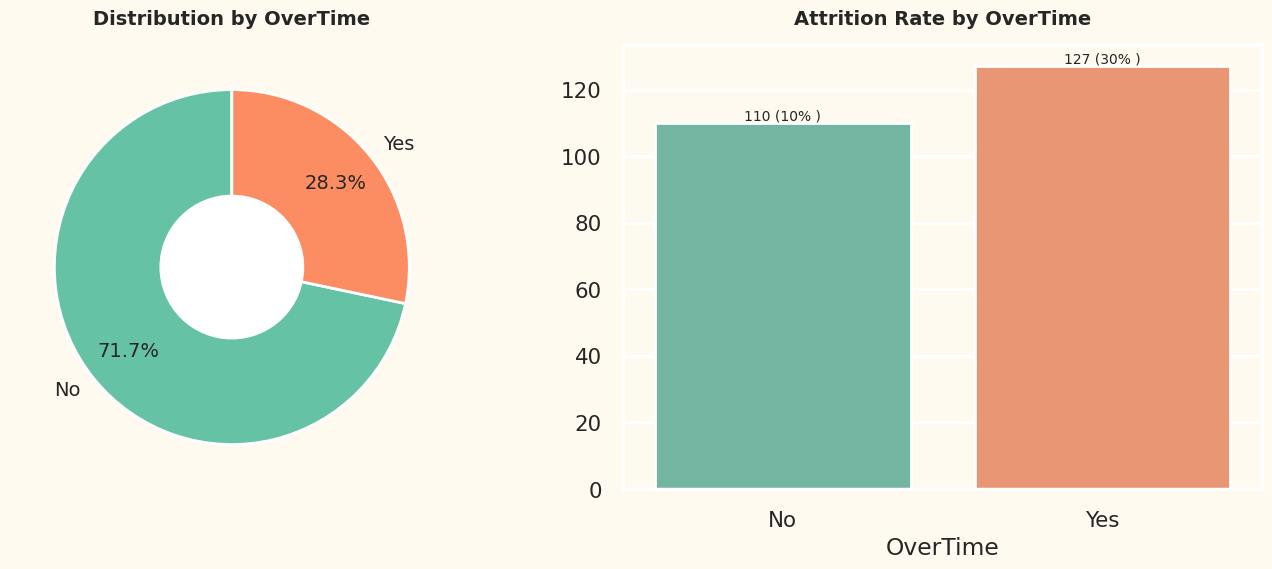

In [ ]:
pie_bar_plot(df1, 'OverTime', 'Attrition')


Analyzing Employee Attrition by Daily Rate.

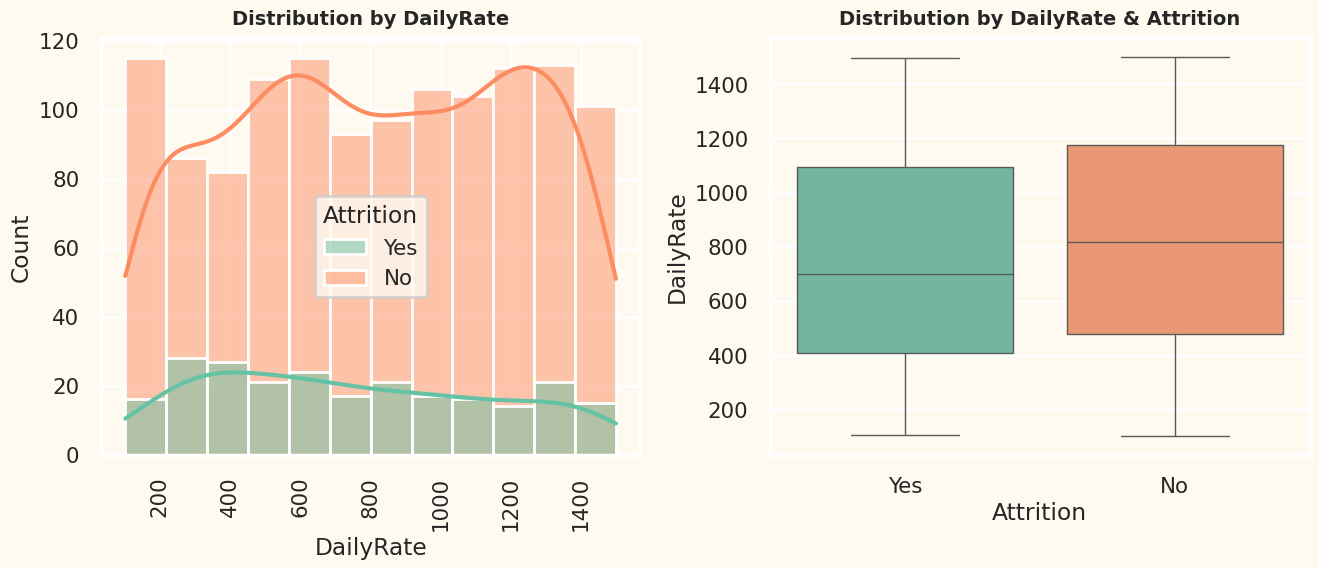

In [ ]:
hist_with_hue(df1, 'DailyRate', 'Attrition')

Analyzing Employee Attrition by Job Roles

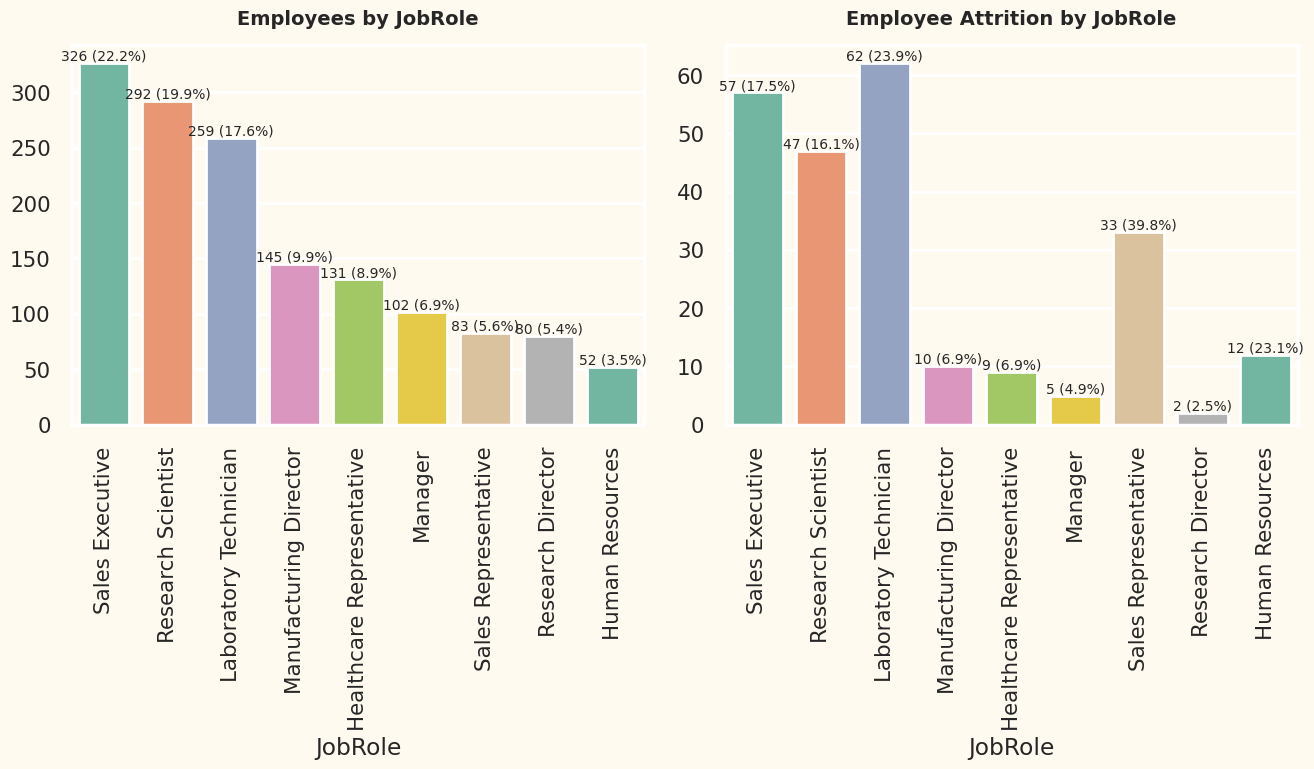

In [ ]:
count_percent_plot(df1, 'JobRole', 'Attrition')

Analyzing Employee Attrition by Job Level.

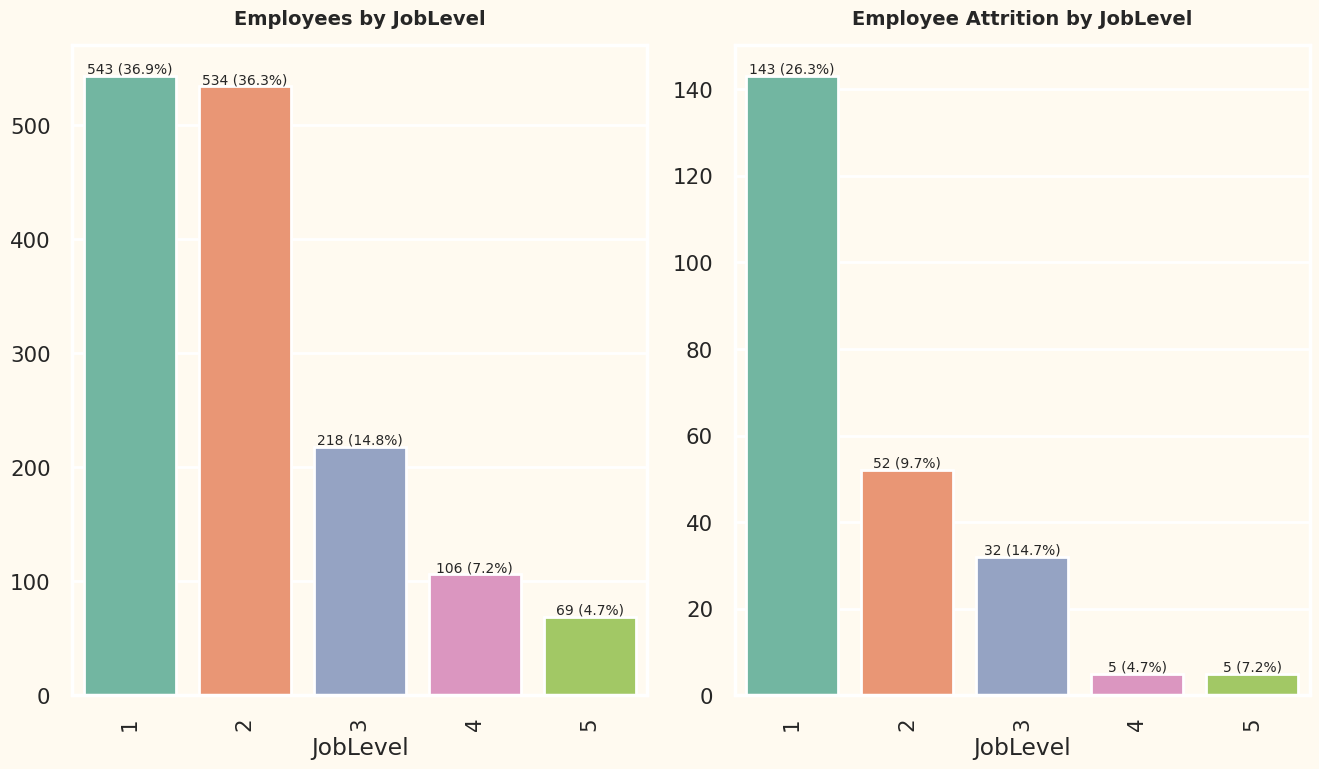

In [ ]:
count_percent_plot(df1, 'JobLevel', 'Attrition')

Analyzing Employee Attrition by Monthly Income.

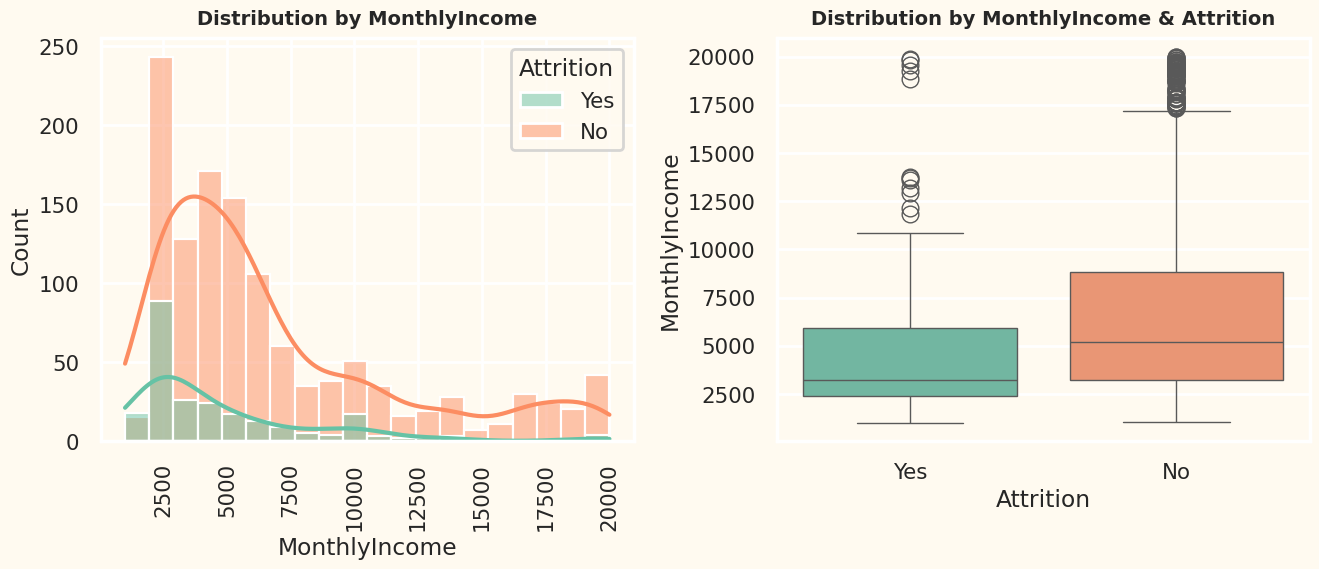

In [ ]:
hist_with_hue(df1, 'MonthlyIncome', 'Attrition')

Analyzing Employee Attrition by Monthly Rate.

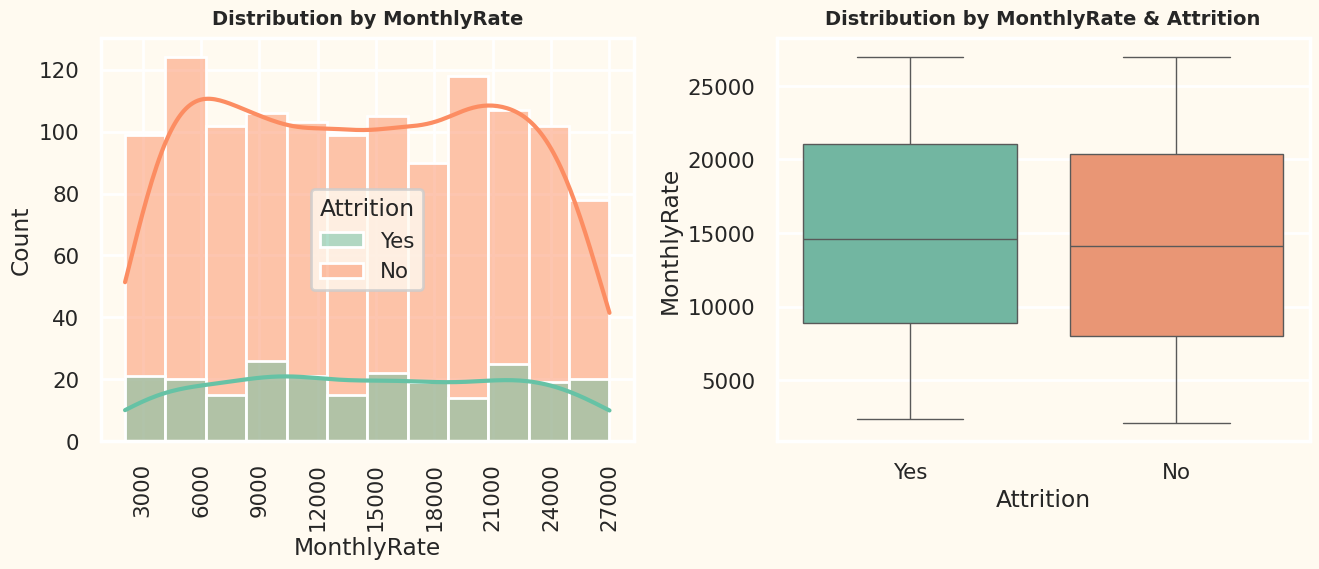

In [ ]:
hist_with_hue(df1, 'MonthlyRate', 'Attrition')

Analyzing Employee Attrition by Distance From Home

In [ ]:
print("Total Unique Values in 'DistanceFromHome' Attribute is =>",df1["DistanceFromHome"].nunique())

Total Unique Values in 'DistanceFromHome' Attribute is => 29


In [ ]:
df1["DistanceFromHome"].describe().to_frame().T



count      mean       std  min  25%  50%   75%   max
DistanceFromHome  1470.0  9.192517  8.106864  1.0  2.0  7.0  14.0  29.0

In [ ]:
# Define the bin edges for the groups
bin_edges = [0,5,10,15,20,30]

# Define the labels for the groups
bin_labels = ['0-5 kms', '6-10 kms', '11-15 kms','16-20 kms', '20+ kms']

# Cuttinf the DistaanceFromHome column into groups
df1['DistanceGroup'] = pd.cut(df1['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

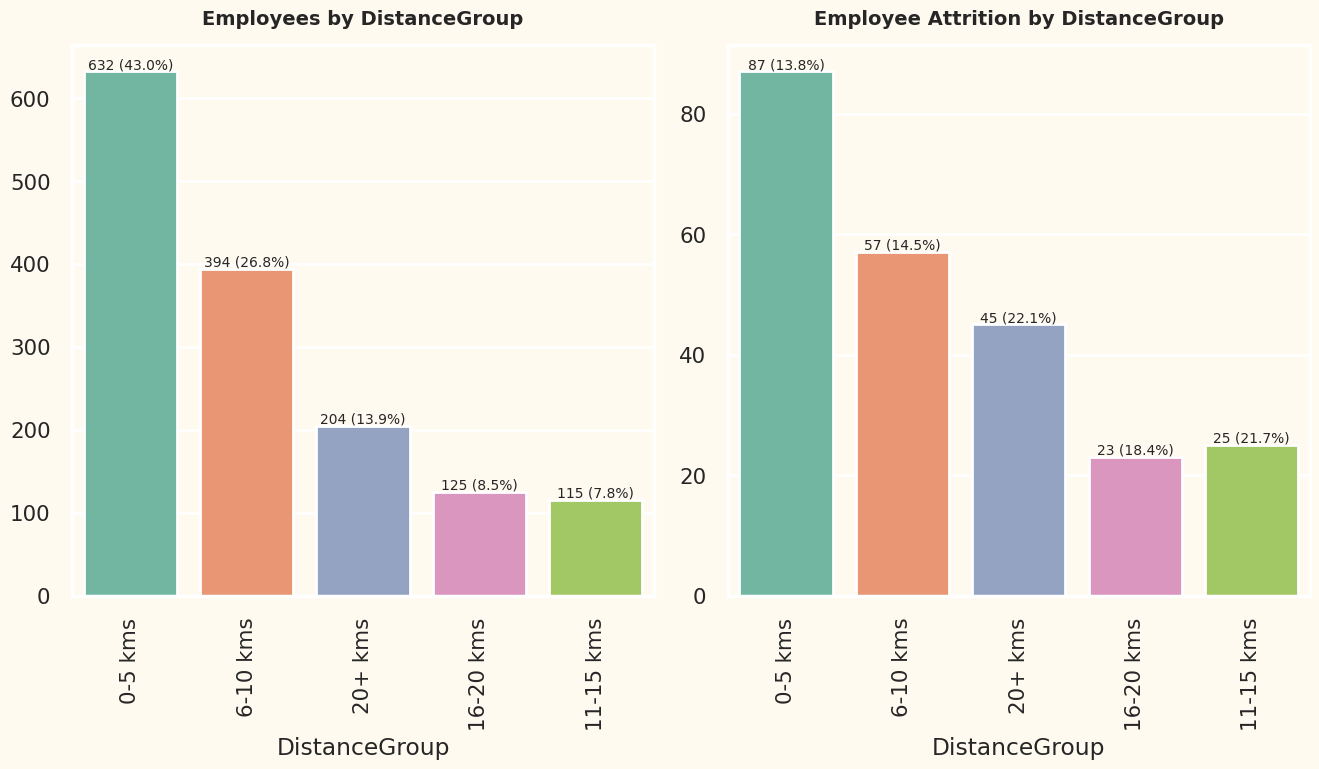

In [ ]:
count_percent_plot(df1, 'DistanceGroup', 'Attrition')

Analyzing Employee Attrition by Number of Companies Worked.

In [ ]:
print("Total Unique Values in 'NumCompaniesWorked' Attribute is =>",df1["NumCompaniesWorked"].nunique())

Total Unique Values in 'NumCompaniesWorked' Attribute is => 10


In [ ]:
df1["NumCompaniesWorked"].describe().to_frame().T

count      mean       std  min  25%  50%  75%  max
NumCompaniesWorked  1470.0  2.693197  2.498009  0.0  1.0  2.0  4.0  9.0

In [ ]:
# Define the bin edges for the groups
bin_edges = [-1, 1, 3, 5, 10]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "6-9 companies"]

# Cut the DailyRate column into groups
df1["NumCompaniesWorkedGroup"] = pd.cut(df1['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

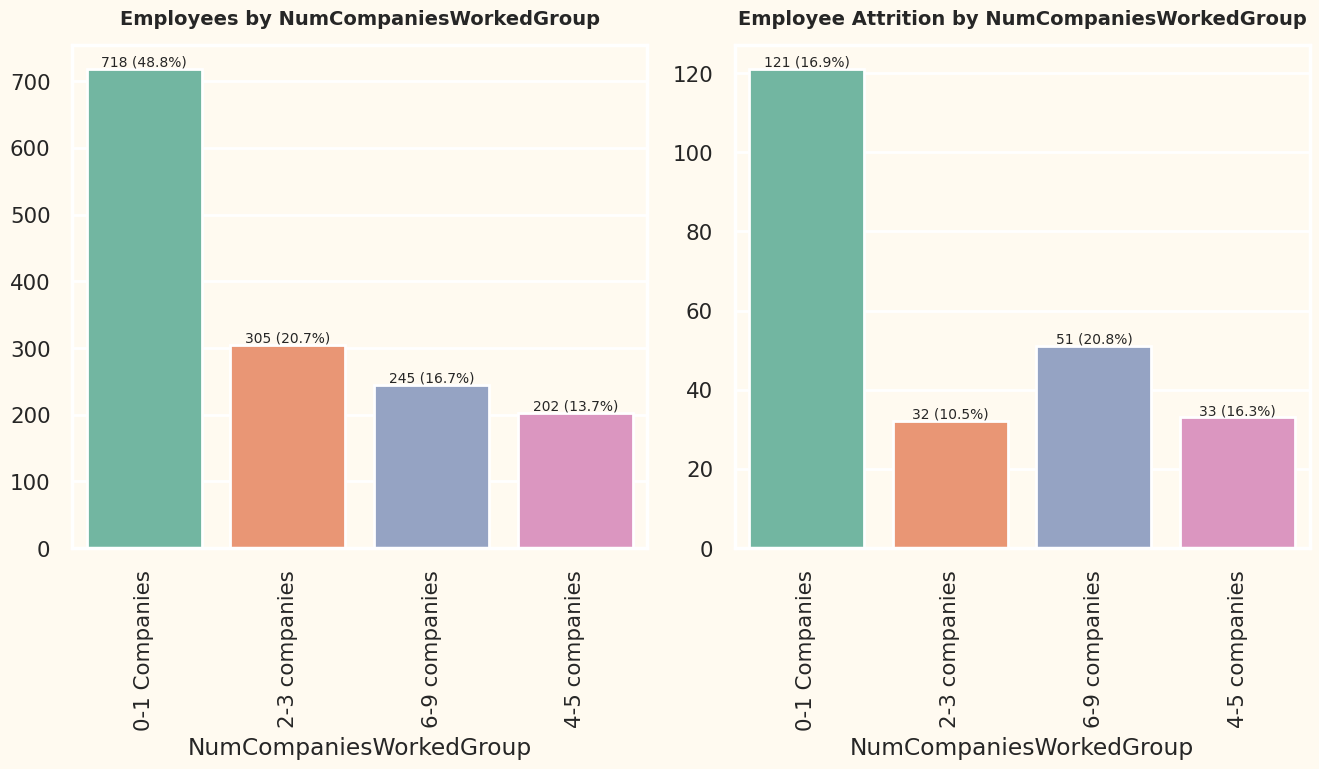

In [ ]:
count_percent_plot(df1, 'NumCompaniesWorkedGroup', 'Attrition')

Analyzing Employee Attrition by Percentage Salary Hike.

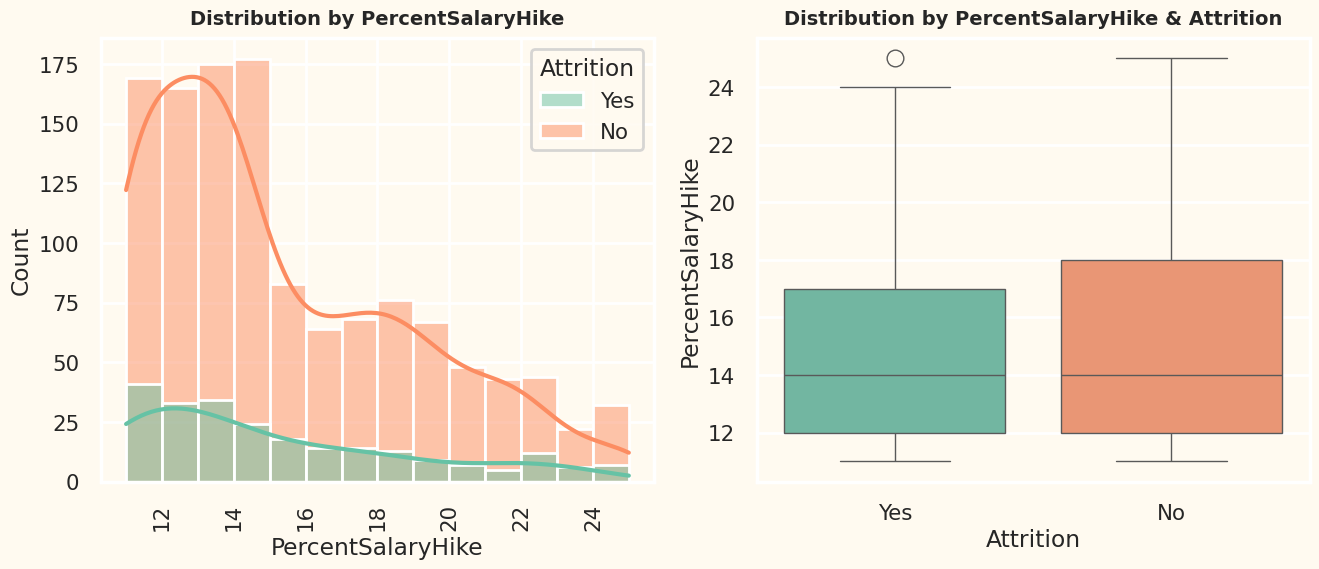

In [ ]:
hist_with_hue(df1, 'PercentSalaryHike', 'Attrition')


Analyzing Employee Attrition by Total Working Years.

In [ ]:
print("Total Unique Values in 'TotalWorkingYears' Attribute is =>",df1["TotalWorkingYears"].nunique())

Total Unique Values in 'TotalWorkingYears' Attribute is => 40


In [ ]:
df1["TotalWorkingYears"].describe().to_frame().T

count       mean       std  min  25%   50%   75%   max
TotalWorkingYears  1470.0  11.279592  7.780782  0.0  6.0  10.0  15.0  40.0

In [ ]:
# Define the bin edges for the groups
bin_edges = [-1, 3, 5, 10, 20, 50]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-3 years', '4-5 years', '6-10 years', '11-20 years', "20+ years"]

# Cut the DailyRate column into groups
df1["TotalWorkingYearsGroup"] = pd.cut(df1['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)

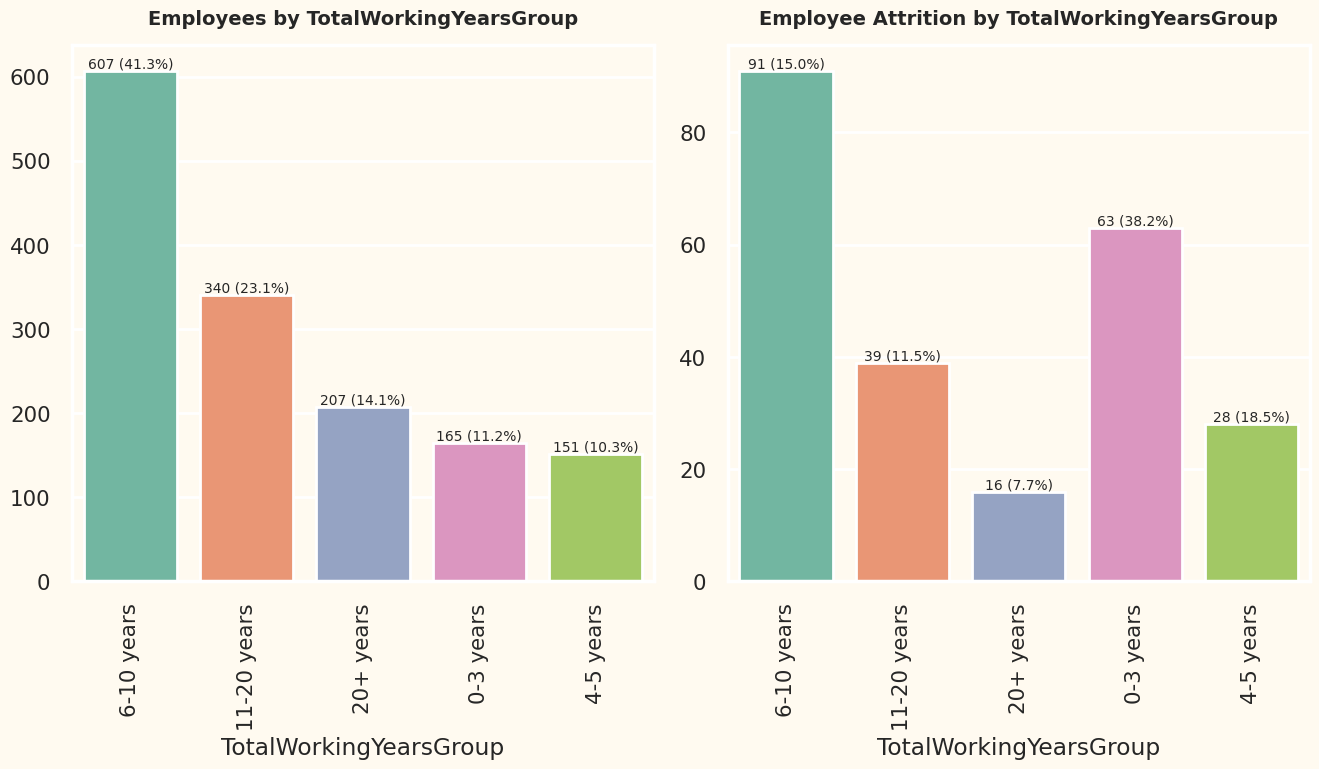

In [ ]:
count_percent_plot(df1, 'TotalWorkingYearsGroup', 'Attrition')

Statistical Analysis - Feature Importance

Performing ANOVA Test to Analyze the Numerical Features Importance in Employee Attrition.

In [ ]:
num_cols = df1.select_dtypes(np.number).columns

In [ ]:
new_data = df1.copy()
new_data["Attrition"] = new_data["Attrition"].replace({"No":0,"Yes":1})

In [ ]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_data[column],new_data["Attrition"])

    f_scores[column] = f_score
    p_values[column] = p_value

Visualizing the F_Score of ANOVA Test of Each Numerical features.

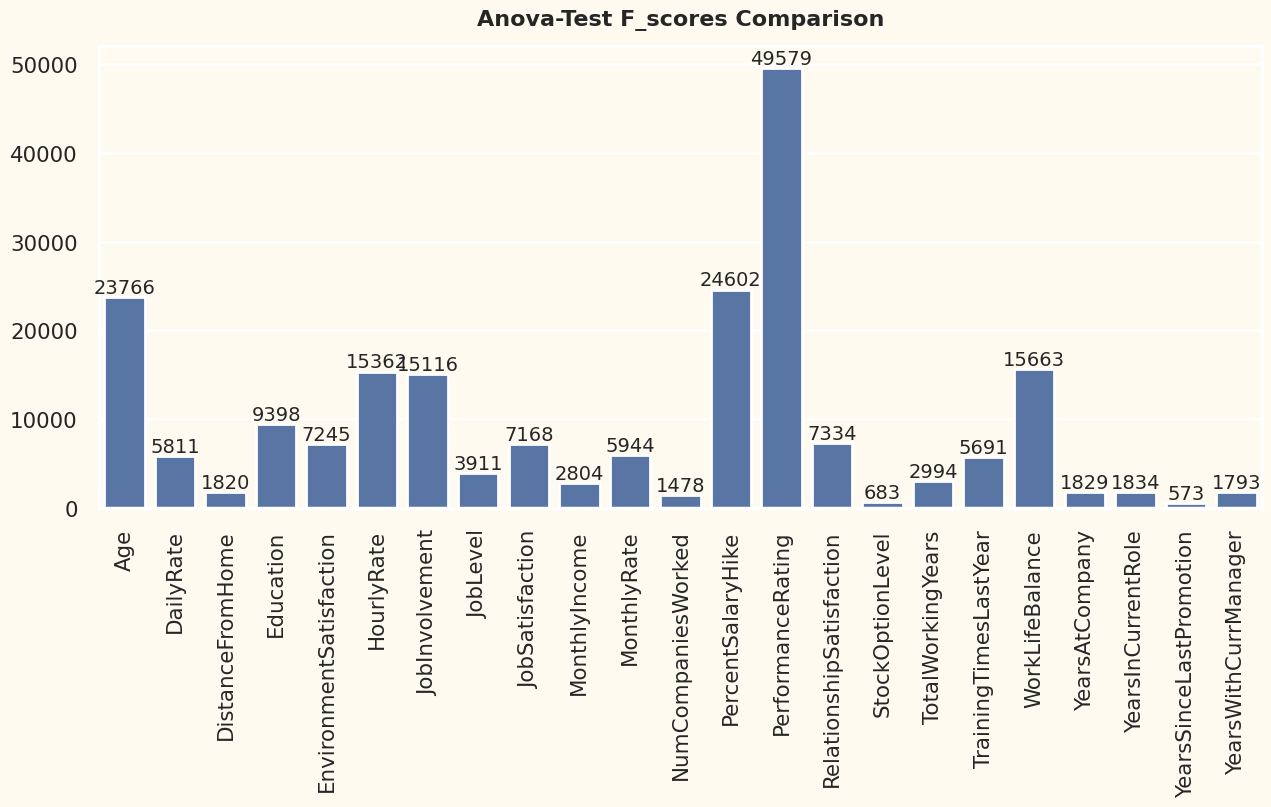

In [ ]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=14)
plt.show()

Comparing F_Score and P_value of ANOVA Test.

In [ ]:
annova_data = pd.DataFrame({"Features":keys,"F_Score":values})
annova_data["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
annova_data

Features       F_Score                 P_value
0                        Age  23766.934042  0.00000000000000000000
1                  DailyRate   5811.796569  0.00000000000000000000
2           DistanceFromHome   1820.614585  0.00000000000000000000
3                  Education   9398.987566  0.00000000000000000000
4    EnvironmentSatisfaction   7245.704914  0.00000000000000000000
5                 HourlyRate  15362.122371  0.00000000000000000000
6             JobInvolvement  15116.579563  0.00000000000000000000
7                   JobLevel   3911.331585  0.00000000000000000000
8            JobSatisfaction   7168.703089  0.00000000000000000000
9              MonthlyIncome   2804.459632  0.00000000000000000000
10               MonthlyRate   5944.089071  0.00000000000000000000
11        NumCompaniesWorked   1478.188633  0.00000000000000000000
12         PercentSalaryHike  24602.507947  0.00000000000000000000
13         PerformanceRating  49579.088833  0.00000000000000000000
14  RelationshipSatisfaction   7334.250922  0.00000000000000000000
15          StockOptionLevel    683.069576  0.00000000000000000000
16         TotalWorkingYears   2994.906310  0.00000000000000000000
17     TrainingTimesLastYear   5691.401732  0.00000000000000000000
18           WorkLifeBalance  15663.161434  0.00000000000000000000
19            YearsAtCompany   1829.442766  0.00000000000000000000
20        YearsInCurrentRole   1834.262264  0.00000000000000000000
21   YearsSinceLastPromotion    573.896430  0.00000000000000000000
22      YearsWithCurrManager   1793.291314  0.00000000000000000000

Performing Chi-Square Test to Analyze the Categorical Feature Importance in Employee Attrition.

In [ ]:
cat_cols = df1.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [ ]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df1[col], df1['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

Visualizing the Chi-Square Statistic Values of Each Categorical Features.

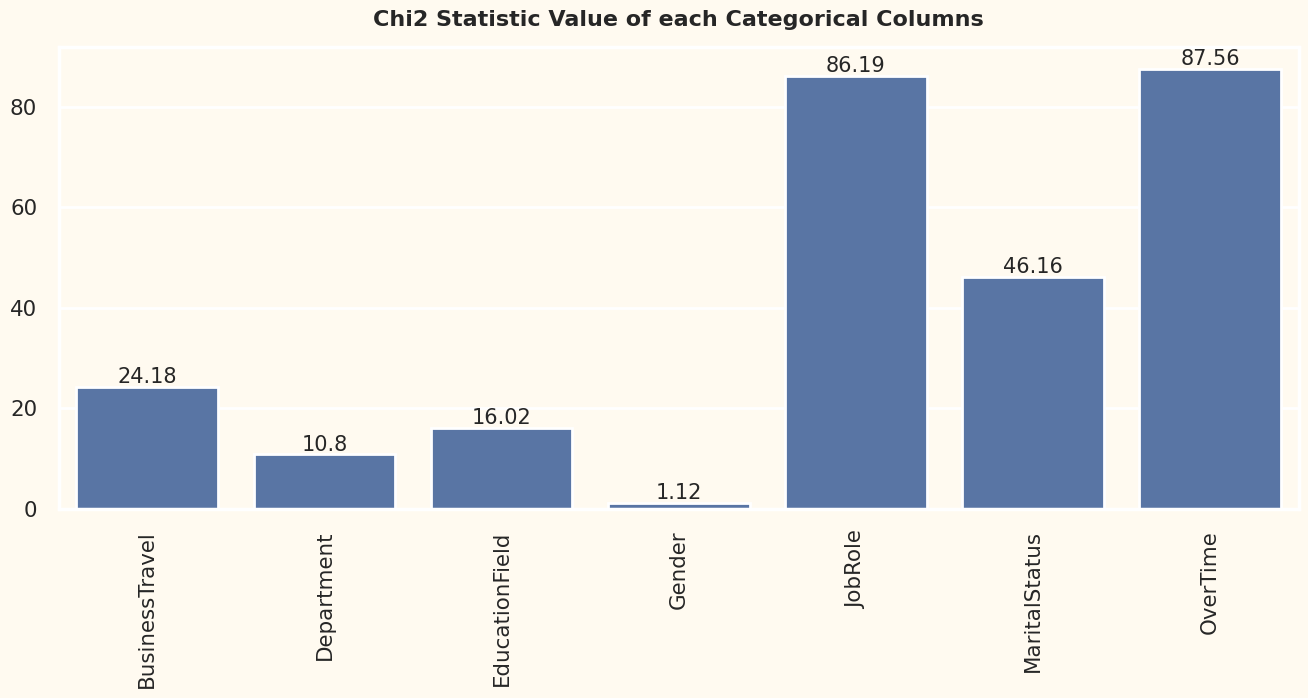

In [ ]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

Comparing Chi2_Statistic and P_value of Chi_Square Test.

In [ ]:
chi_data = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_data["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
chi_data

Features  Chi_2 Statistic                 P_value
0  BusinessTravel        24.182414  0.00000560861447644993
1      Department        10.796007  0.00452560657447963286
2  EducationField        16.024674  0.00677398013902521211
3          Gender         1.116967  0.29057244902890855265
4         JobRole        86.190254  0.00000000000000275248
5   MaritalStatus        46.163677  0.00000000009455511060
6        OverTime        87.564294  0.00000000000000000001

Encoding


In [ ]:
# droping the columns which we have created for analysis purpose
cols = ["DistanceGroup", "NumCompaniesWorkedGroup", "TotalWorkingYearsGroup"]
df1.drop(columns=cols, inplace=True)

In [ ]:
cat_cols = df1.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [ ]:
df1["Gender"] = df1["Gender"].replace({"Female":0 ,"Male":1})


Label Encoding for remaining Categorical Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1["Attrition"] = le.fit_transform(df1['Attrition'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [ ]:
encoded = encoder.fit_transform(df1[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']])

In [ ]:
encoded_df1 = pd.DataFrame(encoded.toarray(),columns = encoder.get_feature_names_out())

In [ ]:
df1 = pd.concat([df1,encoded_df1],axis=1)

In [ ]:
df1= df1.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime'],axis =1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

Correlation Matrix

<Axes: title={'center': 'Correlation Plot'}>

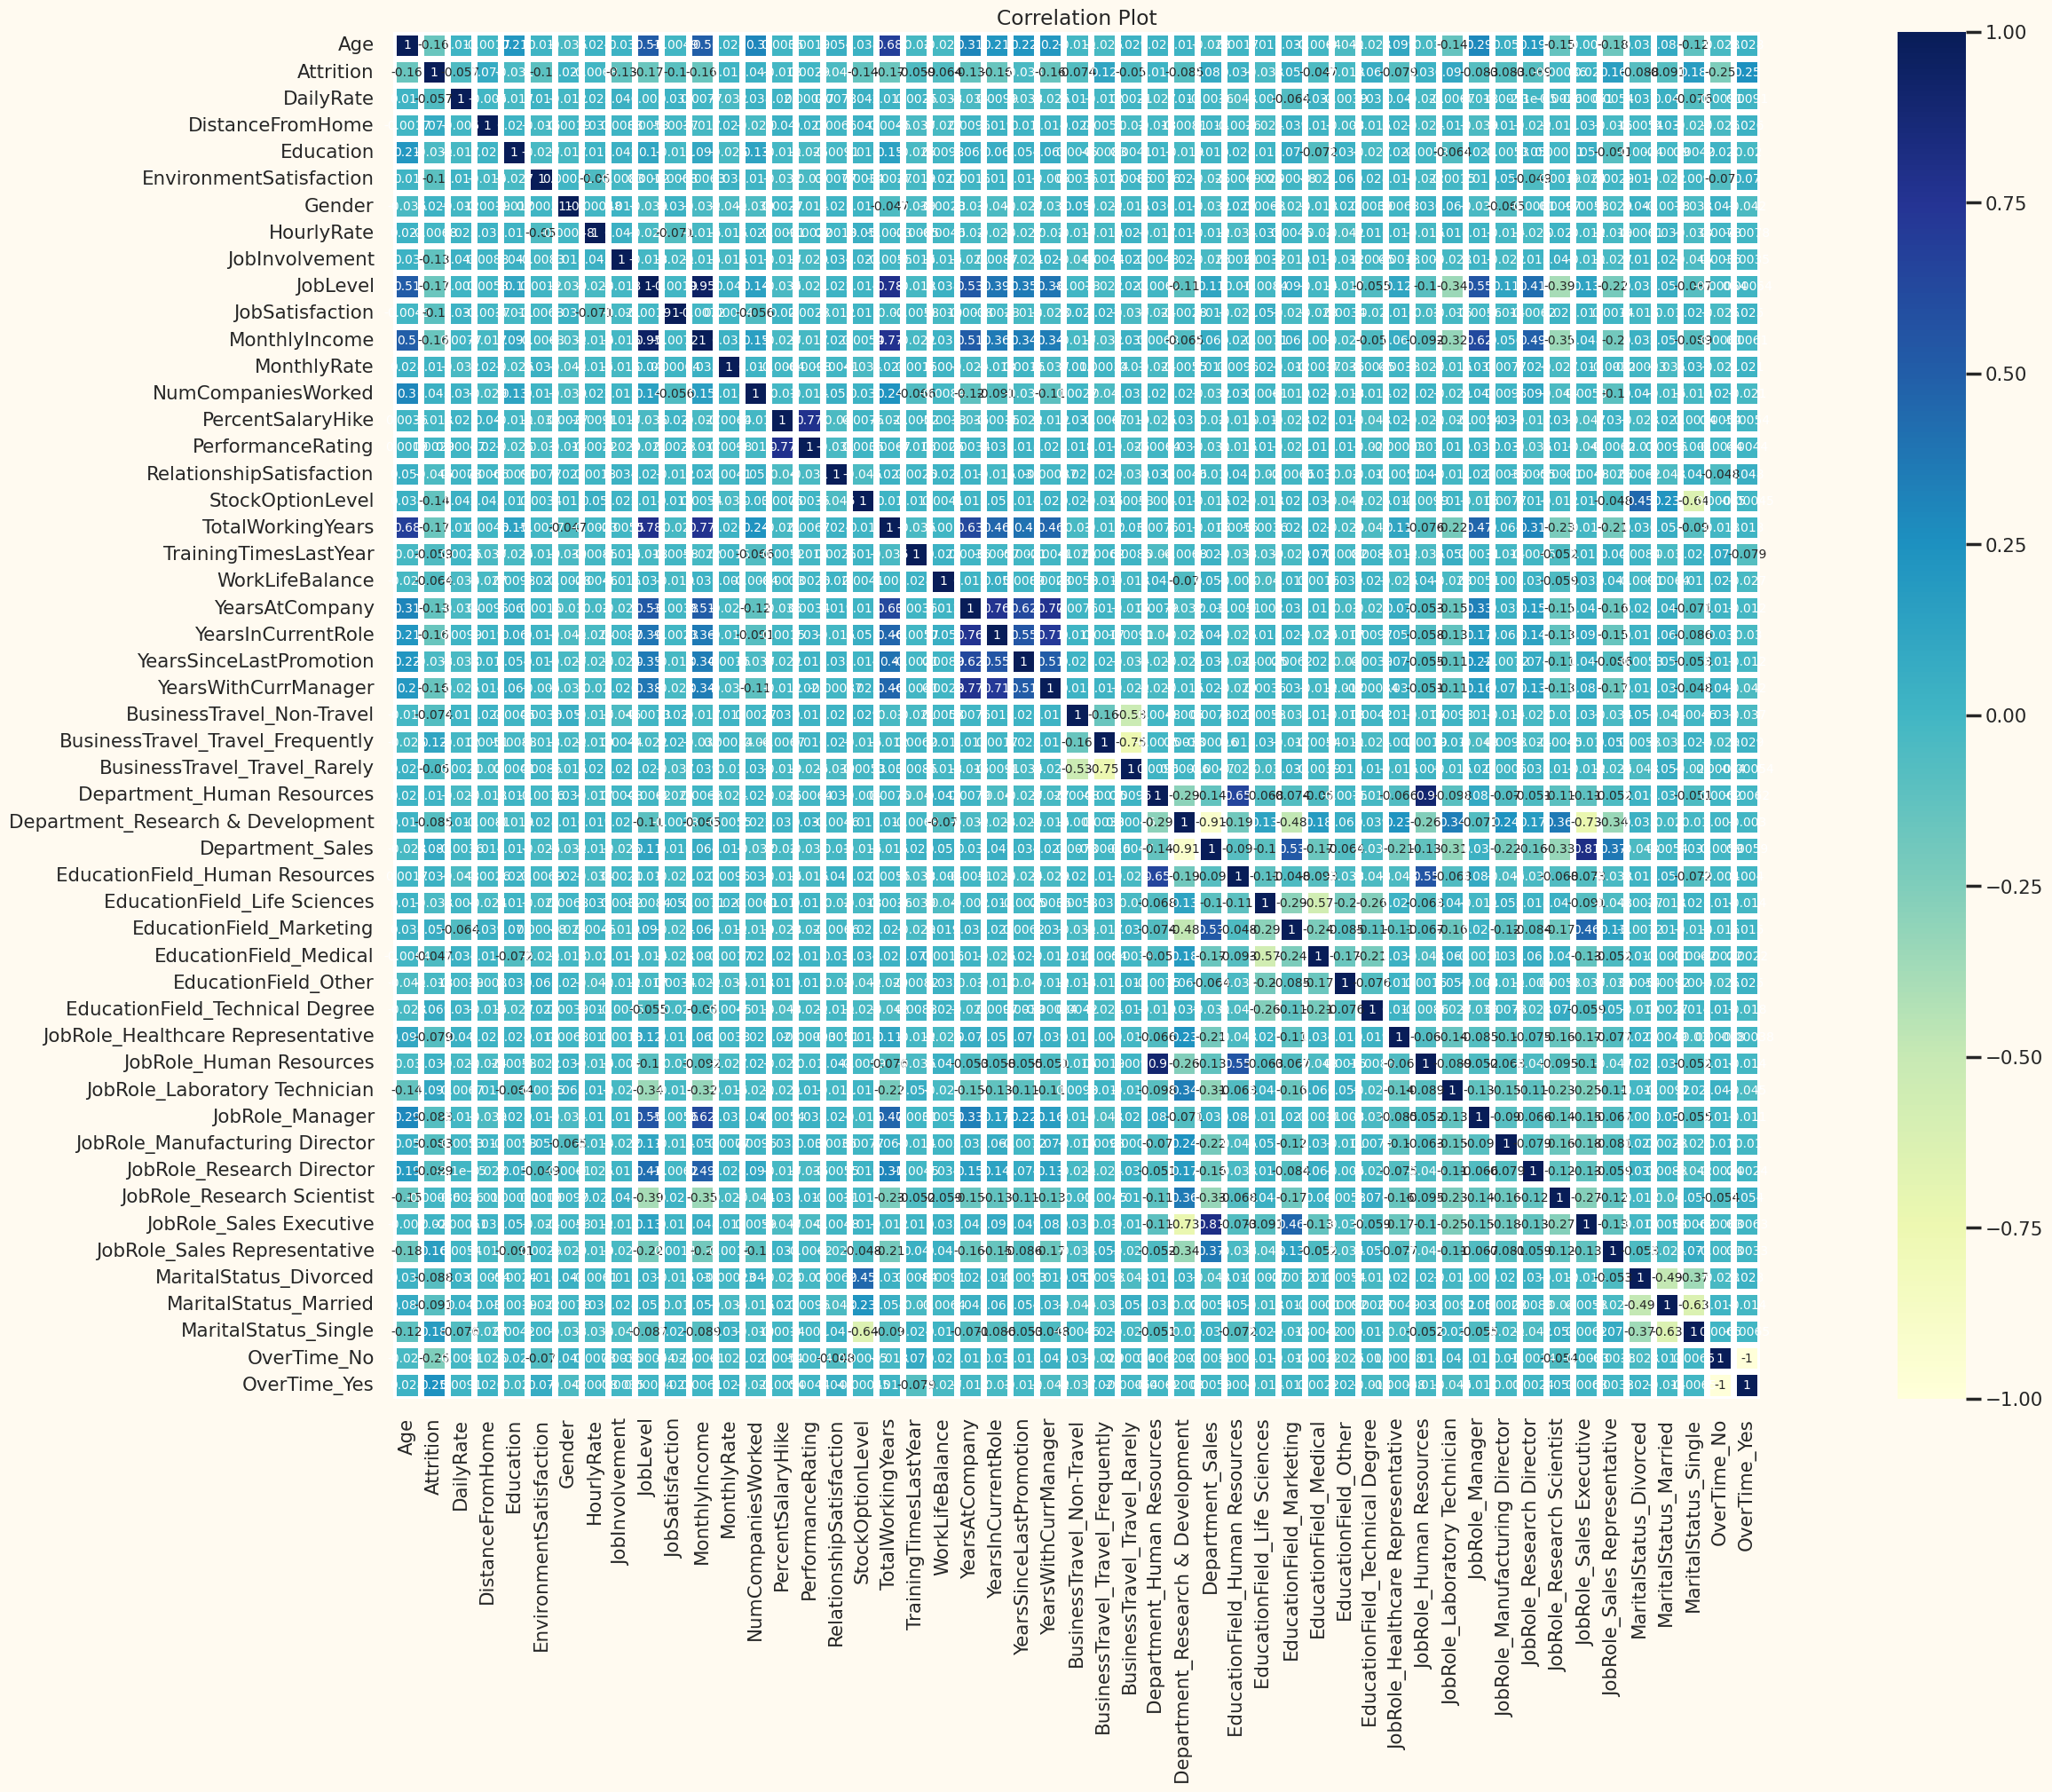

In [ ]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df1.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
JobLevel and MonthlyIncome
JobLevel and TotalWorkingYears
MonthlyIncome and TotalWorkingYears
PercentSalaryHike and PerformanceRating
YearsAtCompany and YearsInCurrentRole
YearsAtCompany and YearsWithCurrManager
Department_Human Resources and JobRole_Human Resources
Department_Sales and JobRole_Sales Executive


In [ ]:
# droping columns which are highly correlated

cols = ["JobLevel", "TotalWorkingYears", "PercentSalaryHike", "YearsInCurrentRole", "YearsWithCurrManager"]
df1.drop(columns=cols, inplace=True)


Checking the Imbalance in the Dataset

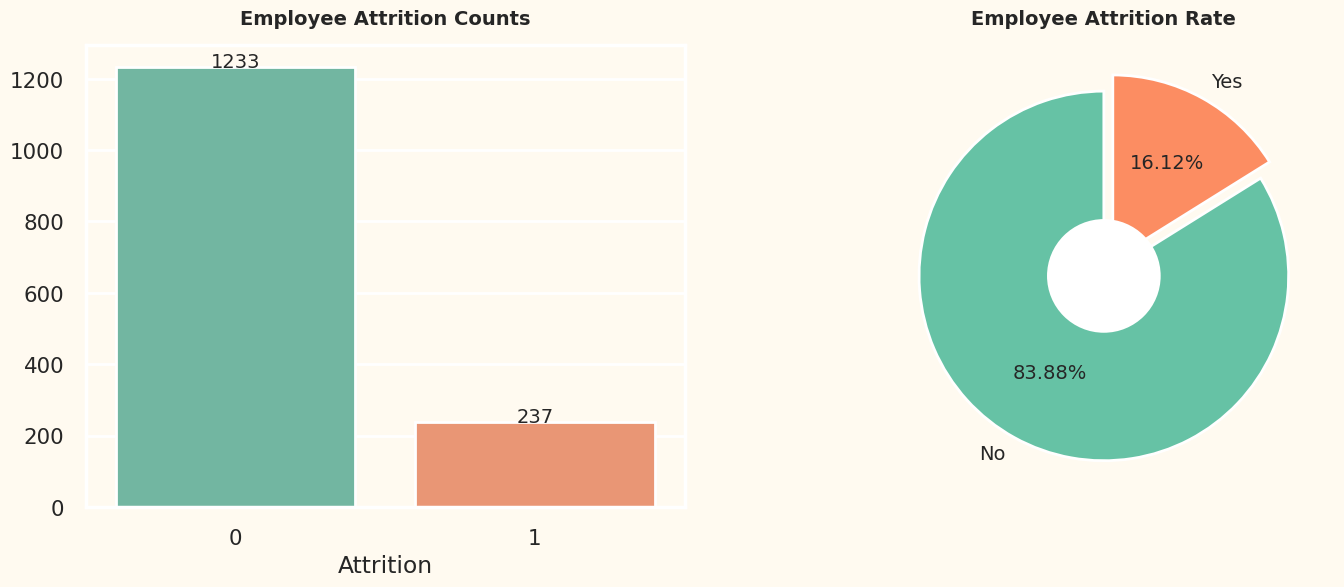

In [ ]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df1["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

Split the Data into Independent and Dependent Variable

In [ ]:
x = df1.drop(['Attrition'], axis=1)
y = df1[['Attrition']]

Balance the Dataset using SMOTE

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Before Smoote" , y.value_counts())
print()
print("After Smoote" , y_smote.value_counts())

Before Smoote Attrition
0            1233
1             237
Name: count, dtype: int64

After Smoote Attrition
0            1233
1            1233
Name: count, dtype: int64


Feature Scaling



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x_smote)

Split the Data into Training and Test

Split the Data into Training and Test (UnScaled)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

Split the Data into Training and Test (scaled)

In [ ]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y_smote, test_size=0.2, random_state=42)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.2 MB/s eta 0:00:00


In [ ]:
# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
import os
from sklearn.base import ClassifierMixin
#from scikeras.wrappers import KerasClassifier


#for hypertuning
import optuna
from collections import Counter
from catboost import CatBoostError
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score # for Gini-mean
from sklearn.metrics import roc_curve

Baseline Model Building

In [ ]:
training_score = []
testing_score = []
precission = []
recall = []
Roc_Auc_score = []
f1_score_ = []
kappa_score = []
G_Mean = []

Model Building for Scaled Data

In [ ]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    y_test_prob1 = model.predict_proba(x_test1)[:, 1]
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    c = precision_score(y_test1,x_test_pred1)
    d = recall_score(y_test1,x_test_pred1)
    e = roc_auc_score(y_test1, y_test_prob1)
    f = f1_score(y_test1,x_test_pred1)
    g = cohen_kappa_score(y_test1, x_test_pred1)
    h = balanced_accuracy_score(y_test1,x_test_pred1)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    f1_score_.append(f)
    kappa_score.append(g)
    G_Mean.append(h)


    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"ROC_AUC Score of {model} model is:", e)
    print(f"f1 Score of {model} model is:", f)
    print(f"kappa Score of {model} model is:", g)
    print(f"G_mean Score of {model} model is:", h)

    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test1,x_test_pred1))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba1 = model.predict_proba(x_test1)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)
    auc = roc_auc_score(y_test1, y_pred_proba1)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()

1. Linear Regressor Model


------------------------------------------------------------------------
Accuracy_Score of LogisticRegression() model on Training Data is: 86.35902636916836
Accuracy_Score of LogisticRegression() model on Testing Data is: 85.82995951417004
Precision Score of LogisticRegression() model is: 0.848
Recall Score of LogisticRegression() model is: 0.8688524590163934
ROC_AUC Score of LogisticRegression() model is: 0.9307704918032788
f1 Score of LogisticRegression() model is: 0.8582995951417004
kappa Score of LogisticRegression() model is: 0.7166409911829297
G_mean Score of LogisticRegression() model is: 0.8584262295081967

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       250
           1       0.85      0.87      0.86       244

    accuracy                           0.86       494
   macro avg       0.86      

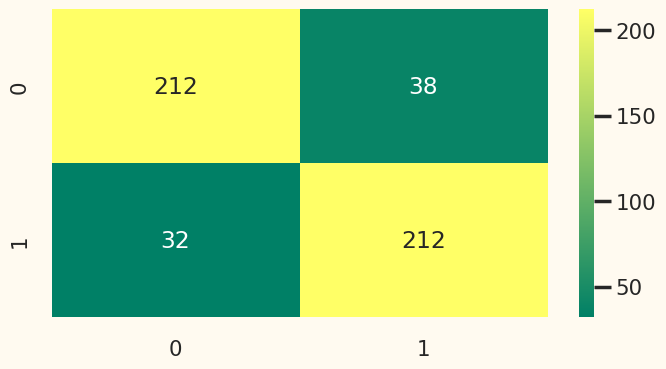


------------------------------------------------------------------------
ROC - AUC Curve of LogisticRegression() model is:


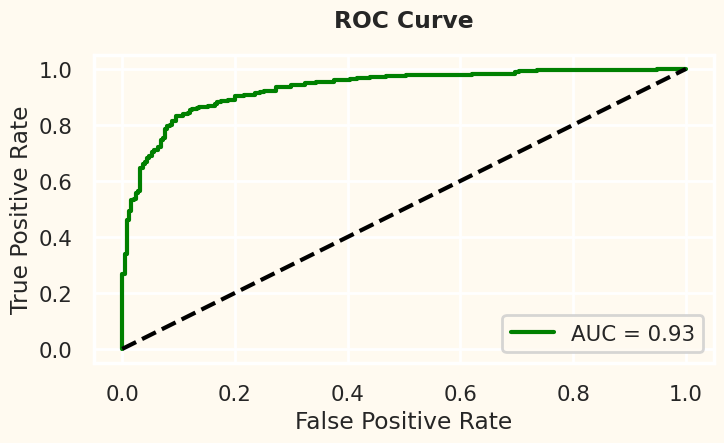

In [ ]:
model_prediction(LogisticRegression())

K Nearest Neighbors(KNN)


------------------------------------------------------------------------
Accuracy_Score of KNeighborsClassifier() model on Training Data is: 91.37931034482759
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 88.66396761133603
Precision Score of KNeighborsClassifier() model is: 0.8197278911564626
Recall Score of KNeighborsClassifier() model is: 0.9877049180327869
ROC_AUC Score of KNeighborsClassifier() model is: 0.9708032786885246
f1 Score of KNeighborsClassifier() model is: 0.895910780669145
kappa Score of KNeighborsClassifier() model is: 0.7738021259198692
G_mean Score of KNeighborsClassifier() model is: 0.8878524590163934

------------------------------------------------------------------------
Classification Report of KNeighborsClassifier() model is:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88       250
           1       0.82      0.99      0.90       244

    accuracy                           0.89       494

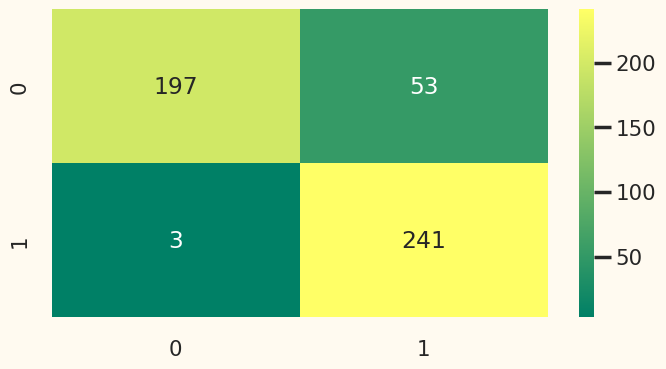


------------------------------------------------------------------------
ROC - AUC Curve of KNeighborsClassifier() model is:


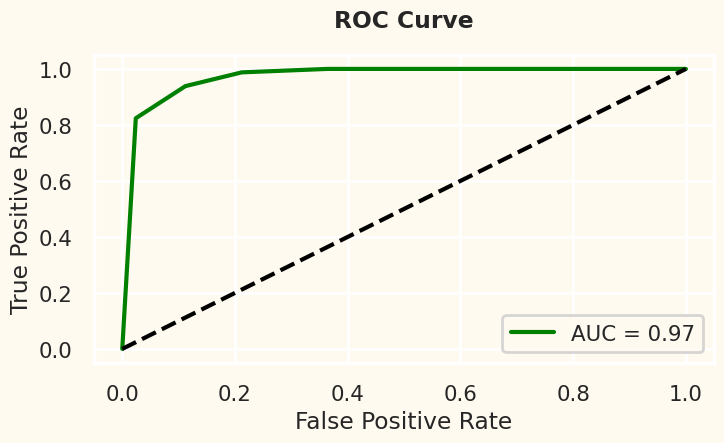

In [ ]:
model_prediction(KNeighborsClassifier())

Naive Bayes


------------------------------------------------------------------------
Accuracy_Score of GaussianNB() model on Training Data is: 75.5578093306288
Accuracy_Score of GaussianNB() model on Testing Data is: 77.53036437246963
Precision Score of GaussianNB() model is: 0.7138263665594855
Recall Score of GaussianNB() model is: 0.9098360655737705
ROC_AUC Score of GaussianNB() model is: 0.8828360655737706
f1 Score of GaussianNB() model is: 0.8
kappa Score of GaussianNB() model is: 0.5520171239032041
G_mean Score of GaussianNB() model is: 0.7769180327868852

------------------------------------------------------------------------
Classification Report of GaussianNB() model is:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       250
           1       0.71      0.91      0.80       244

    accuracy                           0.78       494
   macro avg       0.80      0.78      0.77       494
weighted avg       0.80      0.78      0.77       

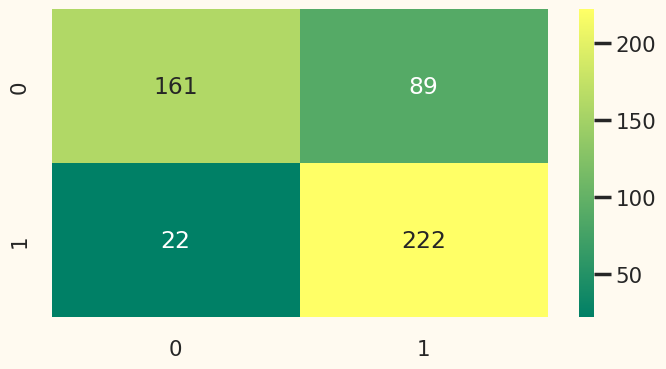


------------------------------------------------------------------------
ROC - AUC Curve of GaussianNB() model is:


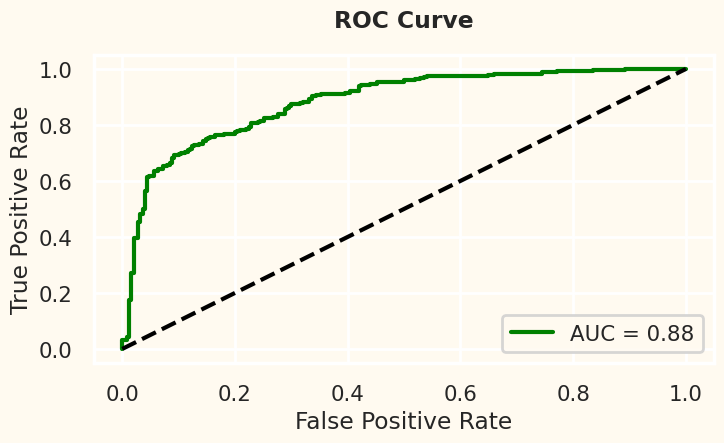

In [ ]:
model_prediction(GaussianNB())

Model Building for Unscaled Data

In [ ]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    f = f1_score(y_test,x_test_pred)
    g = cohen_kappa_score(y_test, x_test_pred)
    h = balanced_accuracy_score(y_test,x_test_pred)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    f1_score_.append(f)
    kappa_score.append(g)
    G_Mean.append(h)

    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)

    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test, model.predict(x_test)))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba = model.predict_proba(x_test)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()

Decision Tree


------------------------------------------------------------------------
Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 86.43724696356276
Precision Score of DecisionTreeClassifier() model is: 0.8582995951417004
Recall Score of DecisionTreeClassifier() model is: 0.8688524590163934
AUC Score of DecisionTreeClassifier() model is: 0.8644262295081967

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       250
           1       0.86      0.87      0.86       244

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494


------------------------------------------------------------------------
Confusion Matrix o

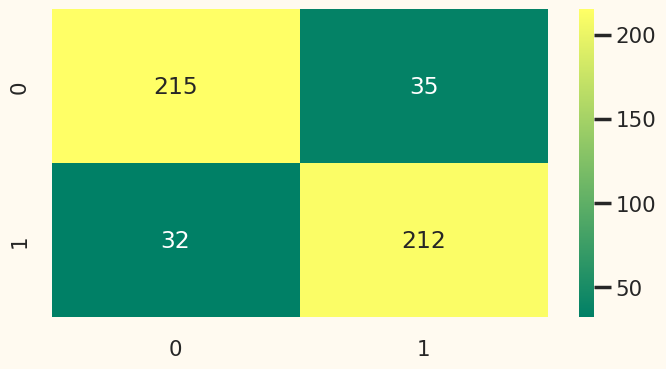


------------------------------------------------------------------------
ROC - AUC Curve of DecisionTreeClassifier() model is:


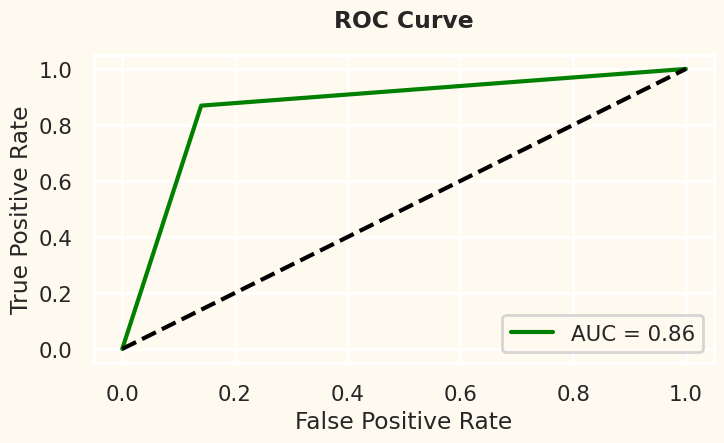

In [ ]:
model_prediction(DecisionTreeClassifier())

Random Forest


------------------------------------------------------------------------
Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 92.71255060728745
Precision Score of RandomForestClassifier() model is: 0.956140350877193
Recall Score of RandomForestClassifier() model is: 0.8934426229508197
AUC Score of RandomForestClassifier() model is: 0.9771311475409836

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       250
           1       0.96      0.89      0.92       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


------------------------------------------------------------------------
Confusion Matrix of

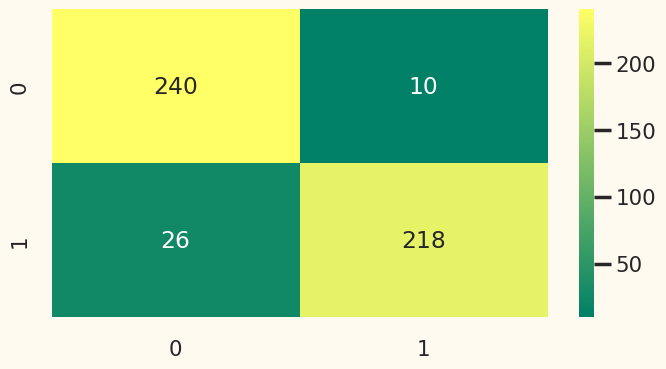


------------------------------------------------------------------------
ROC - AUC Curve of RandomForestClassifier() model is:


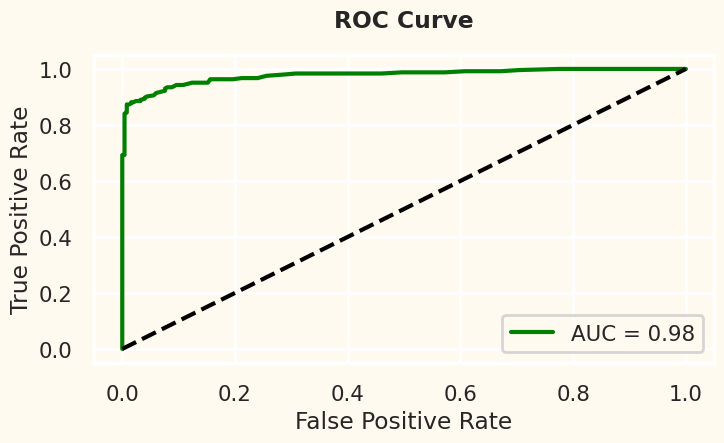

In [ ]:
model_prediction(RandomForestClassifier())

Ada Boost


------------------------------------------------------------------------
Accuracy_Score of AdaBoostClassifier() model on Training Data is: 93.15415821501014
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 90.08097165991903
Precision Score of AdaBoostClassifier() model is: 0.9012345679012346
Recall Score of AdaBoostClassifier() model is: 0.8975409836065574
AUC Score of AdaBoostClassifier() model is: 0.9578524590163934

------------------------------------------------------------------------
Classification Report of AdaBoostClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       250
           1       0.90      0.90      0.90       244

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494


------------------------------------------------------------------------
Confusion Matrix of AdaBoostCl

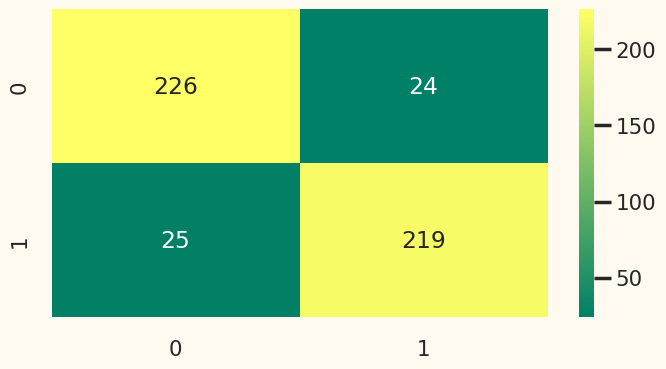


------------------------------------------------------------------------
ROC - AUC Curve of AdaBoostClassifier() model is:


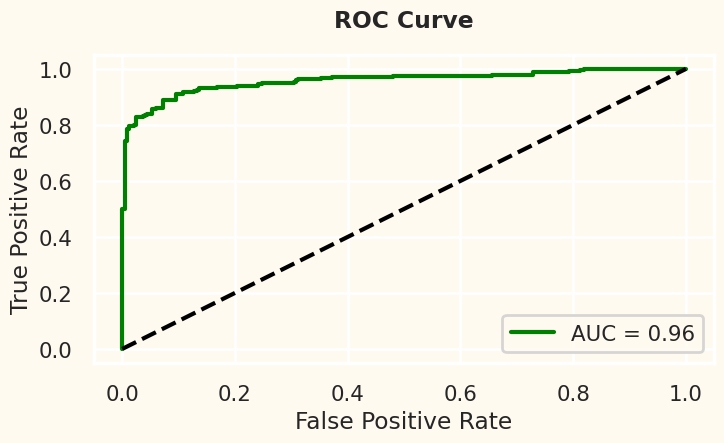

In [ ]:
model_prediction(AdaBoostClassifier())

Gradient Boosting


------------------------------------------------------------------------
Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 96.95740365111561
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 92.3076923076923
Precision Score of GradientBoostingClassifier() model is: 0.9557522123893806
Recall Score of GradientBoostingClassifier() model is: 0.8852459016393442
AUC Score of GradientBoostingClassifier() model is: 0.9657868852459016

------------------------------------------------------------------------
Classification Report of GradientBoostingClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       250
           1       0.96      0.89      0.92       244

    accuracy                           0.92       494
   macro avg       0.93      0.92      0.92       494
weighted avg       0.93      0.92      0.92       494


--------------------------------------------------------

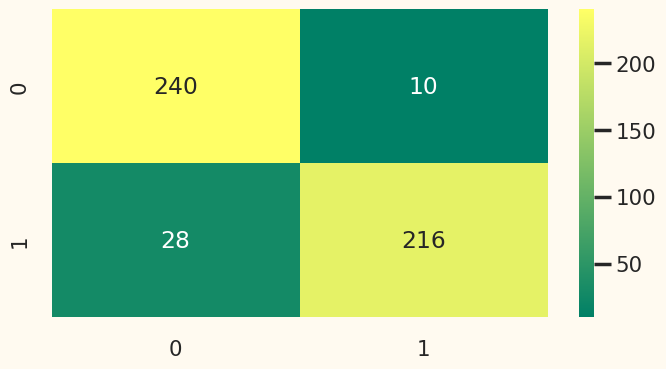


------------------------------------------------------------------------
ROC - AUC Curve of GradientBoostingClassifier() model is:


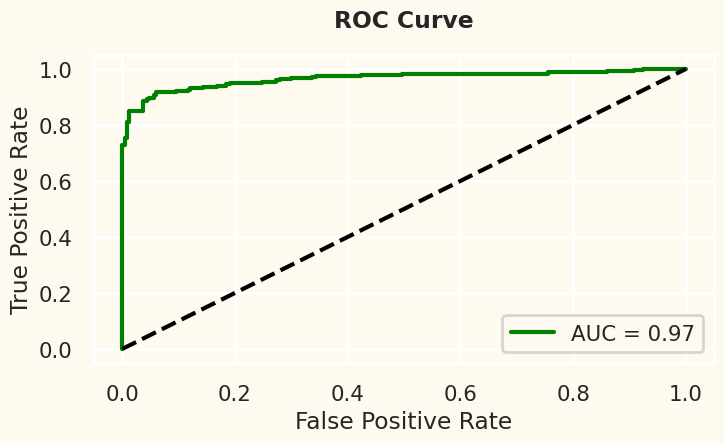

In [ ]:
model_prediction(GradientBoostingClassifier())

XG Boost


------------------------------------------------------------------------
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, 

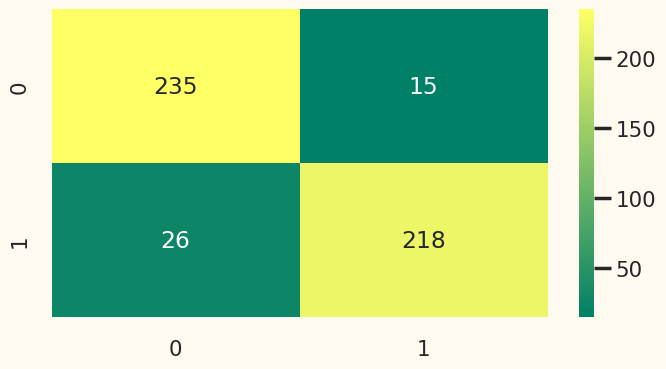


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model is:


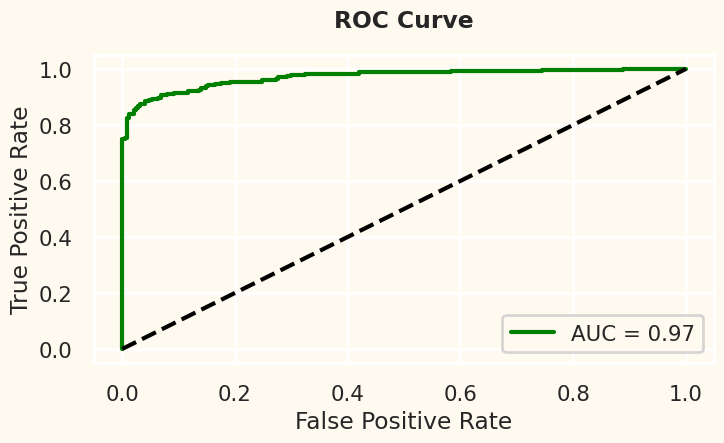

In [ ]:
model_prediction(XGBClassifier())

CatBoost



Learning rate set to 0.013768
0:	learn: 0.6821075	total: 71.8ms	remaining: 1m 11s
1:	learn: 0.6706118	total: 92.7ms	remaining: 46.3s
2:	learn: 0.6609491	total: 106ms	remaining: 35.4s
3:	learn: 0.6509518	total: 119ms	remaining: 29.7s
4:	learn: 0.6386659	total: 132ms	remaining: 26.2s
5:	learn: 0.6296893	total: 145ms	remaining: 24.1s
6:	learn: 0.6200018	total: 159ms	remaining: 22.6s
7:	learn: 0.6091509	total: 176ms	remaining: 21.8s
8:	learn: 0.5989616	total: 202ms	remaining: 22.2s
9:	learn: 0.5888377	total: 215ms	remaining: 21.3s
10:	learn: 0.5794554	total: 228ms	remaining: 20.5s
11:	learn: 0.5712377	total: 241ms	remaining: 19.8s
12:	learn: 0.5634045	total: 254ms	remaining: 19.3s
13:	learn: 0.5552212	total: 273ms	remaining: 19.2s
14:	learn: 0.5468679	total: 287ms	remaining: 18.8s
15:	learn: 0.5399569	total: 299ms	remaining: 18.4s
16:	learn: 0.5329939	total: 313ms	remaining: 18.1s
17:	learn: 0.5264611	total: 327ms	remaining: 17.8s
18:	learn: 0.5193003	total: 340ms	remaining: 17.6s
19:	lear

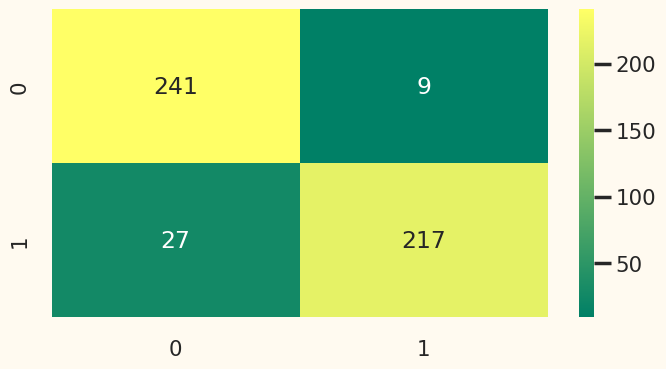


------------------------------------------------------------------------
ROC - AUC Curve of <catboost.core.CatBoostClassifier object at 0x7d280107d180> model is:


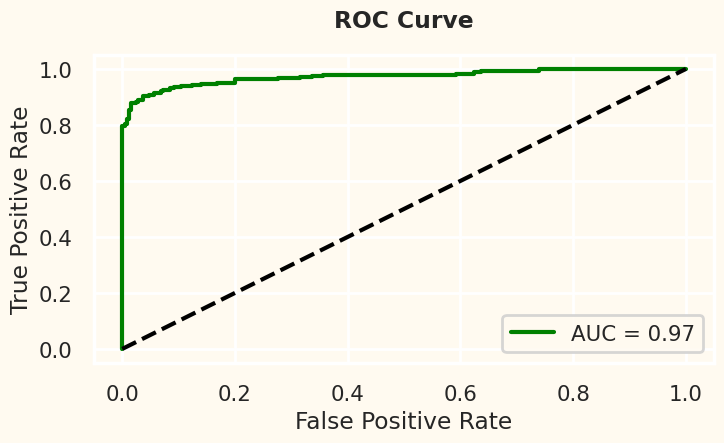

In [ ]:
model_prediction(CatBoostClassifier())